# Loading Required Libraries 

In [44]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Data Analysis (Wrangling/Cleaning)

In [45]:
# Define the file path relative to the current notebook
file_path = './input/proteasomeDB.csv'

try:
    # Read the CSV file
    df = pd.read_csv(file_path)
    print("Successfully loaded proteasomeDB.csv!\n")
    
    # Display basic information
    print("Dataset Overview:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    
    print("\nColumn names:")
    print(df.columns.tolist())
    
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    
    print("\nData types of columns:")
    print(df.dtypes)
    
    print("\nMissing values in each column:")
    print(df.isnull().sum())
    
except FileNotFoundError:
    print("Error: proteasomeDB.csv not found in the input folder. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Successfully loaded proteasomeDB.csv!

Dataset Overview:
Number of rows: 1345
Number of columns: 24

Column names:
['runID', 'substrateID', 'substrateSeq', 'digestTime', 'pepSeq', 'scanNum', 'rank', 'ionScore', 'qValue', 'charge', 'PTM', 'replicate', 'filename', 'sampleName', 'sampleDate', 'protIsotype', 'substrateOrigin', 'species', 'instrument', 'fragmentation', 'location', 'productType', 'spliceType', 'positions']

First 5 rows of the dataset:
       runID substrateID             substrateSeq  digestTime  \
0  TSN2-20-1        TSN2  VSRQLRTKAWNRQLYPEWTEAQR          20   
1  TSN2-20-1        TSN2  VSRQLRTKAWNRQLYPEWTEAQR          20   
2  TSN2-20-1        TSN2  VSRQLRTKAWNRQLYPEWTEAQR          20   
3  TSN2-20-1        TSN2  VSRQLRTKAWNRQLYPEWTEAQR          20   
4  TSN2-20-1        TSN2  VSRQLRTKAWNRQLYPEWTEAQR          20   

              pepSeq  scanNum  rank  ionScore  qValue  charge  ... sampleDate  \
0       QLYPEWTEAQQL    14459     1     20.15  0.0097       2  ...   25.03.21

In [46]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
runID                 0
substrateID           0
substrateSeq          0
digestTime            0
pepSeq                0
scanNum               0
rank                  0
ionScore              0
qValue                0
charge                0
PTM                1161
replicate             0
filename              0
sampleName            0
sampleDate            0
protIsotype           0
substrateOrigin       0
species               0
instrument            0
fragmentation         0
location              0
productType           0
spliceType          475
positions             0
dtype: int64


In [47]:
df.head()


,runID,substrateID,substrateSeq,digestTime,pepSeq,scanNum,rank,ionScore,qValue,charge,...,sampleDate,protIsotype,substrateOrigin,species,instrument,fragmentation,location,productType,spliceType,positions
0,TSN2-20-1,TSN2,VSRQLRTKAWNRQLYPEWTEAQR,20,QLYPEWTEAQQL,14459,1,20.15,0.0097,2,...,25.03.21,20S K562,P40967-2|PMEL[35-57],human,Fusion,HCD,KCL,PSP,revCis;trans,13_22_4_5;13_22_13_14
1,TSN2-20-1,TSN2,VSRQLRTKAWNRQLYPEWTEAQR,20,TEAQLYPEWTE,13067,1,20.19,0.0096,2,...,25.03.21,20S K562,P40967-2|PMEL[35-57],human,Fusion,HCD,KCL,PSP,trans;trans,19_22_14_20;19_21_13_20
2,TSN2-20-1,TSN2,VSRQLRTKAWNRQLYPEWTEAQR,20,VSRQLQLY,7000,1,20.20,0.0095,2,...,25.03.21,20S K562,P40967-2|PMEL[35-57],human,Fusion,HCD,KCL,PSP,cis,1_5_13_15
3,TSN2-20-1,TSN2,VSRQLRTKAWNRQLYPEWTEAQR,20,SKAWNRQLYPEWTEAQR,5649,1,20.25,0.0140,3,...,25.03.21,20S K562,P40967-2|PMEL[35-57],human,Fusion,HCD,KCL,PSP,cis,2_2_8_23
4,TSN2-20-1,TSN2,VSRQLRTKAWNRQLYPEWTEAQR,20,QLYPEWEA,12523,1,20.39,0.0091,2,...,25.03.21,20S K562,P40967-2|PMEL[35-57],human,Fusion,HCD,KCL,PSP,cis,13_18_20_21


In [48]:
print("Columns in the dataset:")
for col in df.columns:
    print(f"- {col}")



Columns in the dataset:
- runID
- substrateID
- substrateSeq
- digestTime
- pepSeq
- scanNum
- rank
- ionScore
- qValue
- charge
- PTM
- replicate
- filename
- sampleName
- sampleDate
- protIsotype
- substrateOrigin
- species
- instrument
- fragmentation
- location
- productType
- spliceType
- positions


In [49]:
# Drop the 'filename' column which contains the file name
df = df.drop('filename', axis=1)

# Verify the column was dropped
print("\nColumns after dropping 'filename':")
print(df.columns.tolist())


Columns after dropping 'filename':
['runID', 'substrateID', 'substrateSeq', 'digestTime', 'pepSeq', 'scanNum', 'rank', 'ionScore', 'qValue', 'charge', 'PTM', 'replicate', 'sampleName', 'sampleDate', 'protIsotype', 'substrateOrigin', 'species', 'instrument', 'fragmentation', 'location', 'productType', 'spliceType', 'positions']


# Examine the spliceType column which indicates the type of splicing

In [50]:

print("\nSplice types in the dataset:")
print(df['spliceType'].value_counts())


Splice types in the dataset:
spliceType
revCis                         371
trans                          194
cis                            126
revCis;revCis                   62
trans;trans                     26
revCis;trans                    18
cis;trans                       18
cis;cis;cis;cis                 11
revCis;trans;revCis;trans        9
trans;cis                        7
trans;revCis                     7
revCis;trans;revCis              6
revCis;revCis;revCis;revCis      6
trans;cis;trans                  4
revCis;revCis;revCis;cis         2
revCis;trans;cis                 2
trans;trans;trans;trans          1
Name: count, dtype: int64


*we can simplify the splicetypes

# Categorization of Amino Acids

In [51]:

pepSeq_list = df['pepSeq'].tolist()

print(pepSeq_list)


['QLYPEWTEAQQL', 'TEAQLYPEWTE', 'VSRQLQLY', 'SKAWNRQLYPEWTEAQR', 'QLYPEWEA', 'AWNRQLYQL', 'YPEWTEAAW', 'SAWNRQLYPEWTEA', 'LYPEWTEWNRQ', 'SRQLRTKAWNRQLYPEW', 'QLYPEWTEAVSRQLRT', 'KQLYPEW', 'QLYPEWRTK', 'TKAWNRQL', 'EAQQLYPEWTEAQR', 'QLYPEWTEARTKAWNR', 'PEWTEAQY', 'QLYPEWVSRQLRTK', 'QLRTKAWNRQLYPEW', 'VSRQLRTQLYPEWTEA', 'YPEWTEAY', 'AWNRQLYPEWTEVS', 'QLYPEWTEAVSRQLRTKA', 'TEAVSRQLRTKAWNR', 'QLYPEWTEV', 'KAWQLYPEW', 'VSAWNRQLYPEWTEA', 'AWNRQLAW', 'QLYPEWTEAQLY', 'YPEWKA', 'QLKAWNRQL', 'TEAVSRQLRTKAW', 'AWKAWNR', 'QLQLYPEWT', 'PEWKAWNR', 'SRQLYPEWTEA', 'RTKAWNRQQLY', 'QLYPEWTEASRQLRT', 'NRQLYP', 'TEQLYPEWTEA', 'YPEWTEQLYPEW', 'PEWTEAW', 'AWQLYPEWTE', 'AWLYPEWTEAQR', 'SRRTKAWNRQLYPEWTEAQR', 'VSRQLRTKAWNRQL', 'QLYQLYPEW', 'QLQLYPEWTE', 'AWNRQLQL', 'RTKAWNRQLYPEWTEAVS', 'QLYPEWTEAVSRQLR', 'WNRQLYPEWQL', 'VSQLRTKAW', 'LYPEWTEAVSRQLRTK', 'PEWTEARTKAW', 'QLAWNRQLYPEWTEA', 'VNRQLYPEWTEA', 'VSRQLRTKQLYPEWTEA', 'YPEWTEAKA', 'QLYPEWTNRQL', 'RTKAWNRQLV', 'QLYPEWTEAN', 'SRQLAWNR', 'NRQLLRTKAWNR', 'YPE

This function calculates how frequently each amino acid appears across all peptides in the dataset.

In [52]:
def amino_acid_composition(sequences):
    aa_counts = Counter()
    total_length = 0
    for seq in sequences:
        if isinstance(seq, str):  
            aa_counts.update(seq)
            total_length += len(seq)
    return aa_counts, total_length


#Takes a list of peptide sequences as input
#Creates a Counter object to track amino acid occurrences
#Loops through each sequence, checking that it's a string
#Updates the counter with each amino acid in the sequence
#Keeps track of the total length of all sequences
#Returns both the counts and total length

This converts raw counts into percentages, showing what proportion of all amino acids is represented by each type.

In [53]:
aa_counts, total_length = amino_acid_composition(pepSeq_list)

aa_freq = {aa: count / total_length for aa, count in aa_counts.items()}

#Calls the function on our list of peptide sequences (pepSeq_list)
#Normalizes the counts by dividing by the total length
#Creates a dictionary with amino acids as keys and their frequencies as values



to analyze the distribution of peptide lengths in the dataset

In [54]:

peptide_lengths = [len(seq) if isinstance(seq, str) else 0 for seq in pepSeq_list]

This gives us the molecular weight distribution of the peptide.Provides both visual and numerical summaries of the peptide properties.

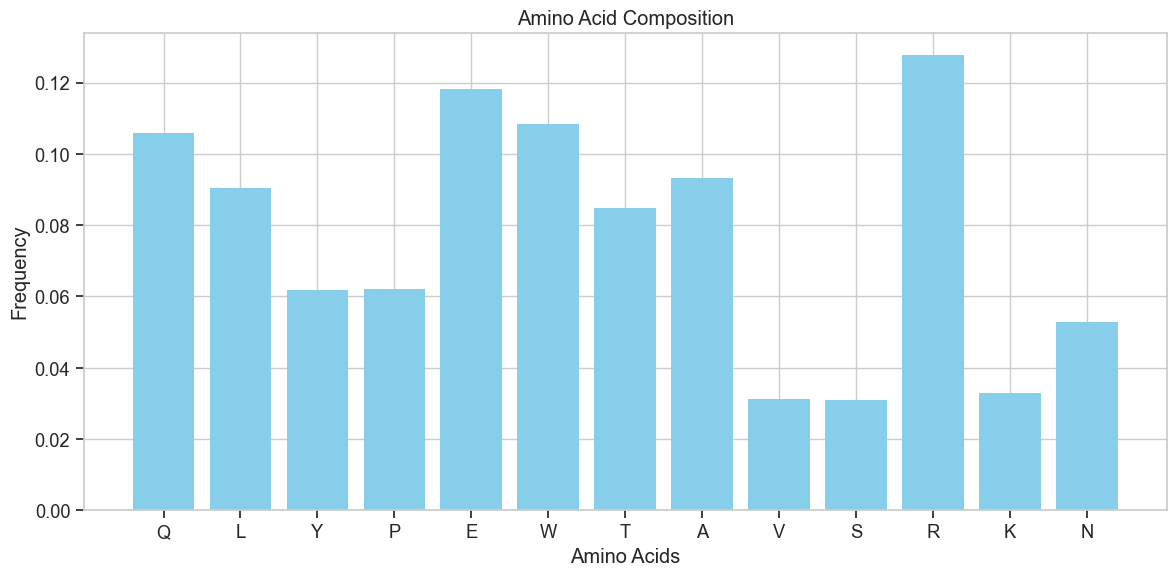

Total Peptides: 1345
Average Peptide Length: 11.87
Average Molecular Weight: 1519.13 Da


In [55]:
try:
    weights = []
    for seq in pepSeq_list:
        if isinstance(seq, str):
            # Replace non-standard amino acids
            clean_seq = ''.join([aa if aa in 'ACDEFGHIKLMNPQRSTVWY' else 'X' for aa in seq])
            # Replace X with A for analysis (simplification)
            clean_seq = clean_seq.replace('X', 'A')
            weights.append(ProteinAnalysis(clean_seq).molecular_weight())
    
    # Plot Amino Acid Composition
    plt.figure(figsize=(12, 6))
    plt.bar(aa_freq.keys(), aa_freq.values(), color='skyblue')
    plt.xlabel('Amino Acids')
    plt.ylabel('Frequency')
    plt.title('Amino Acid Composition')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

        
    # Print Key Stats
    print(f"Total Peptides: {len(pepSeq_list)}")
    print(f"Average Peptide Length: {sum(peptide_lengths) / len(peptide_lengths):.2f}")
    print(f"Average Molecular Weight: {sum(weights) / len(weights):.2f} Da")
    
except Exception as e:
    print(f"Error calculating molecular weights: {str(e)}")
    print("Make sure Biopython is installed: pip install biopython")



The bar chart displays the frequency (percentage) of each amino acid across all peptides in the dataset. Each bar represents one of the 20 standard amino acids, with the height indicating how often that amino acid appears.

(The distribution reveals biases in amino acid usage)

Significance:-Proteasome Preferences:
If certain amino acids are overrepresented (taller bars), this suggests the proteasome preferentially generates peptides containing these amino acids
If certain amino acids are underrepresented (shorter bars), the proteasome might avoid cutting near these amino acids
Comparison to Natural Abundance:
By comparing this distribution to the natural abundance of amino acids in proteins, we can identify which amino acids are enriched or depleted in spliced peptides
For example, if leucine (L) makes up 9% of amino acids in typical proteins but 15% in our peptides, this suggests enrichment


Splicing Mechanism Insights:
Different amino acid preferences might be associated with different splicing mechanisms
For example, hydrophobic amino acids might be more common in cis-spliced peptides.

Biological Relevance:
The amino acid composition affects how these peptides might function biologically
For example, peptides rich in hydrophobic amino acids might interact differently with immune receptors 


Amino Acid Category Counts:
Hydrophobic(aliphatic): 3427 (21.47%)
Hydrophobic(aromatic): 2717 (17.02%)
Hydrophilic: 4380 (27.44%)
Acidic: 1887 (11.82%)
Basic: 2561 (16.05%)
Special: 989 (6.20%)

This bar chart is showing the percentage distribution of amino acids across six functional categories


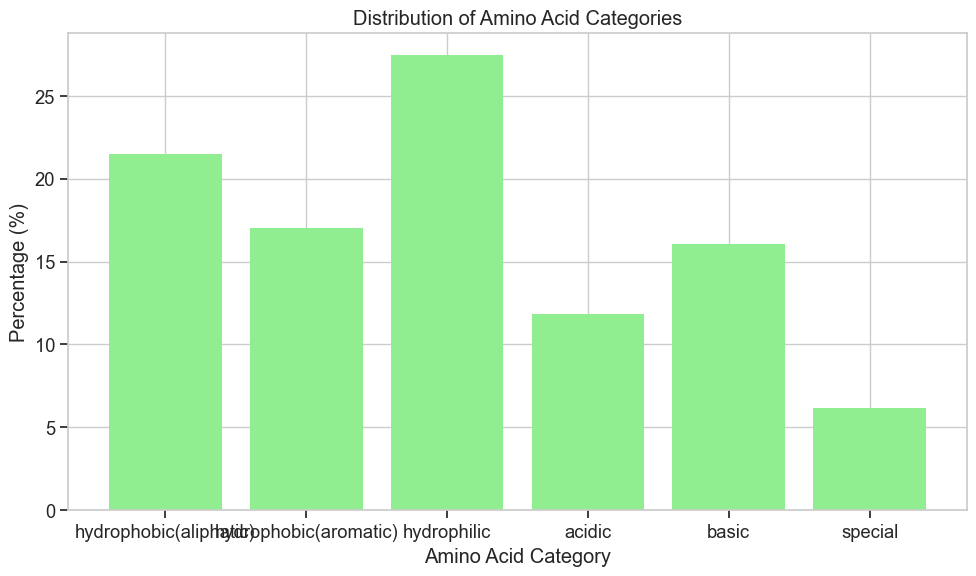

In [56]:
# Amino Acid Categorization Schema
def categorize_amino_acids(sequences):
    """
    Categorize amino acids in peptide sequences based on their properties.
    
    Categories:
    - Hydrophobic(aliphatic): A, V, L, I, M
    - Hydrophobic(aromatic): F, W, Y
    - Hydrophilic: S, T, N, Q, C
    - Acidic: D, E
    - Basic: K, R, H
    - Special: G, P
    
    Returns a dictionary with category counts and percentages.
    """
    categories = {
        'hydrophobic(aliphatic)': ['A', 'V', 'L', 'I', 'M'],
        'hydrophobic(aromatic)': ['F', 'W', 'Y'],
        'hydrophilic': ['S', 'T', 'N', 'Q', 'C'],
        'acidic': ['D', 'E'],
        'basic': ['K', 'R', 'H'],
        'special': ['G', 'P']
    }
    # Initializes counters for each category
    category_counts = {cat: 0 for cat in categories}
    total_aa = 0
    
    # Loops through each sequence and each amino acid. Assigns each amino acid to its appropriate category 
    for seq in sequences:
        if isinstance(seq, str):
            for aa in seq:
                total_aa += 1
                for cat, aa_list in categories.items():
                    if aa in aa_list:
                        category_counts[cat] += 1
                        break
    
    # Calculates the percentage of each category in the overall dataset
    category_percentages = {cat: count / total_aa * 100 if total_aa > 0 else 0 
                           for cat, count in category_counts.items()}
    
    return category_counts, category_percentages, total_aa

# Apply the categorization
category_counts, category_percentages, total_aa = categorize_amino_acids(pepSeq_list)

# Display results
print("\nAmino Acid Category Counts:")
for cat, count in category_counts.items():
    print(f"{cat.capitalize()}: {count} ({category_percentages[cat]:.2f}%)")


print("\nThis bar chart is showing the percentage distribution of amino acids across six functional categories")
#Visualize amino acid categories
plt.figure(figsize=(10, 6))
plt.bar(category_percentages.keys(), category_percentages.values(), color='lightgreen')
plt.xlabel('Amino Acid Category')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Amino Acid Categories')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()





Biochemical Properties of Spliced Peptides:-Hydrophobic (water-repelling),Hydrophilic (water-loving), Charged (acidic or basic), Structurally unique (special).

This categoriztion is for?
Predicting peptide behavior: The category distribution helps predict how peptides might behave in biological systems
Understanding splicing mechanisms: Different category distributions between splicing types provide clues about the underlying mechanisms
Designing peptide-based therapeutics: Knowledge of which categories are common in naturally spliced peptides can guide the design of synthetic peptides
Improving prediction algorithms: These patterns can be incorporated into algorithms that predict which peptides are likely to be generated through splicing.


If certain categories are overrepresented, it suggests the proteasome preferentially generates peptides rich in those amino acid types
If certain categories are underrepresented, it suggests the proteasome might avoid cutting near those amino acid types.



In [57]:
print("\nSplice types in the dataset:")
print(df['spliceType'].value_counts())


Splice types in the dataset:
spliceType
revCis                         371
trans                          194
cis                            126
revCis;revCis                   62
trans;trans                     26
revCis;trans                    18
cis;trans                       18
cis;cis;cis;cis                 11
revCis;trans;revCis;trans        9
trans;cis                        7
trans;revCis                     7
revCis;trans;revCis              6
revCis;revCis;revCis;revCis      6
trans;cis;trans                  4
revCis;revCis;revCis;cis         2
revCis;trans;cis                 2
trans;trans;trans;trans          1
Name: count, dtype: int64



Distribution of splice categories:
spliceCategory
unknown         475
revCis          371
trans           194
cis             126
mixed            71
multi-revCis     68
multi-trans      27
multi-cis        11
complex           2
Name: count, dtype: int64


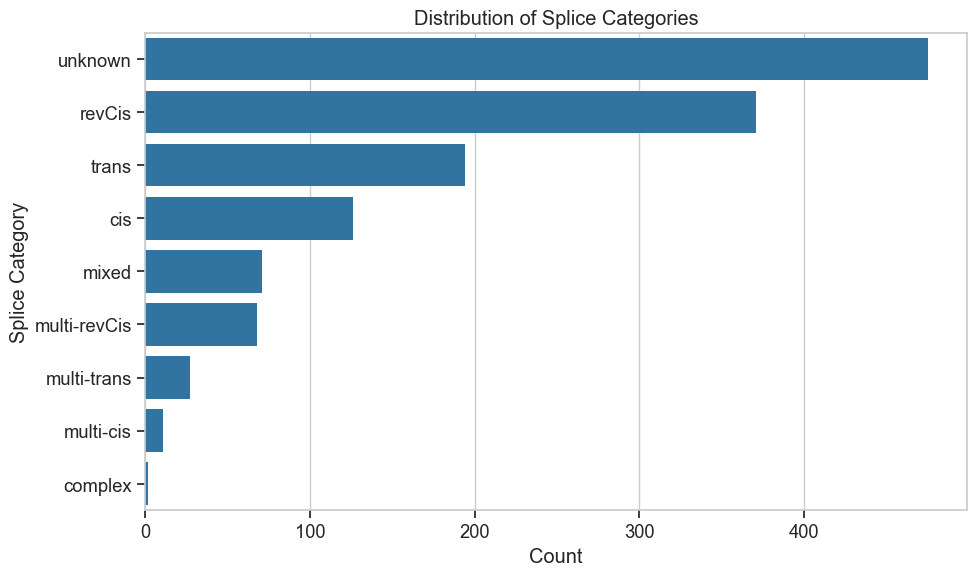

In [58]:
# Create simplified splice categories
def categorize_splice(x):
    if pd.isna(x):
        return 'unknown'
    if not isinstance(x, str):
        return 'other'
    
    # Single splice types
    if x == 'cis':
        return 'cis'
    if x == 'trans':
        return 'trans'
    if x == 'revCis':
        return 'revCis'
    
    # Multiple splice types
    if ';' in x:
        # Check for mixed types
        if 'cis' in x and 'trans' in x:
            return 'mixed'
        if 'revCis' in x and 'trans' in x:
            return 'mixed'
        
        # Same type multiple times
        if 'cis' in x and 'trans' not in x and 'revCis' not in x:
            return 'multi-cis'
        if 'trans' in x and 'cis' not in x and 'revCis' not in x:
            return 'multi-trans'
        if 'revCis' in x and 'cis' not in x and 'trans' not in x:
            return 'multi-revCis'
    
    # Default case
    return 'complex'

# Apply the categorization
df['spliceCategory'] = df['spliceType'].apply(categorize_splice)

# Display the distribution of categories
print("\nDistribution of splice categories:")
print(df['spliceCategory'].value_counts())

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='spliceCategory', data=df, order=df['spliceCategory'].value_counts().index)
plt.title('Distribution of Splice Categories')
plt.xlabel('Count')
plt.ylabel('Splice Category')
plt.tight_layout()
plt.show()

In [59]:
# Check for missing values in spliceType column
missing_count = df['spliceType'].isna().sum()
print(f"Number of missing values in spliceType column: {missing_count}")

# Check for empty strings or whitespace
empty_string_count = (df['spliceType'] == '').sum()
whitespace_count = df['spliceType'].str.isspace().sum() if hasattr(df['spliceType'], 'str') else 0
print(f"Number of empty strings: {empty_string_count}")
print(f"Number of whitespace-only entries: {whitespace_count}")

# Check for other non-standard values
if not df['spliceType'].isna().all():  # Only if there are some non-NaN values
    unique_values = df['spliceType'].dropna().unique()
    print(f"Unique non-NaN values in spliceType: {len(unique_values)}")
    print("Sample of unique values:")
    print(unique_values[:10])  # Show first 10 unique values

Number of missing values in spliceType column: 475
Number of empty strings: 0
Number of whitespace-only entries: 0
Unique non-NaN values in spliceType: 17
Sample of unique values:
['revCis;trans' 'trans;trans' 'cis' 'revCis' 'trans' 'cis;trans'
 'cis;cis;cis;cis' 'revCis;trans;revCis' 'revCis;revCis;revCis;cis'
 'revCis;revCis']


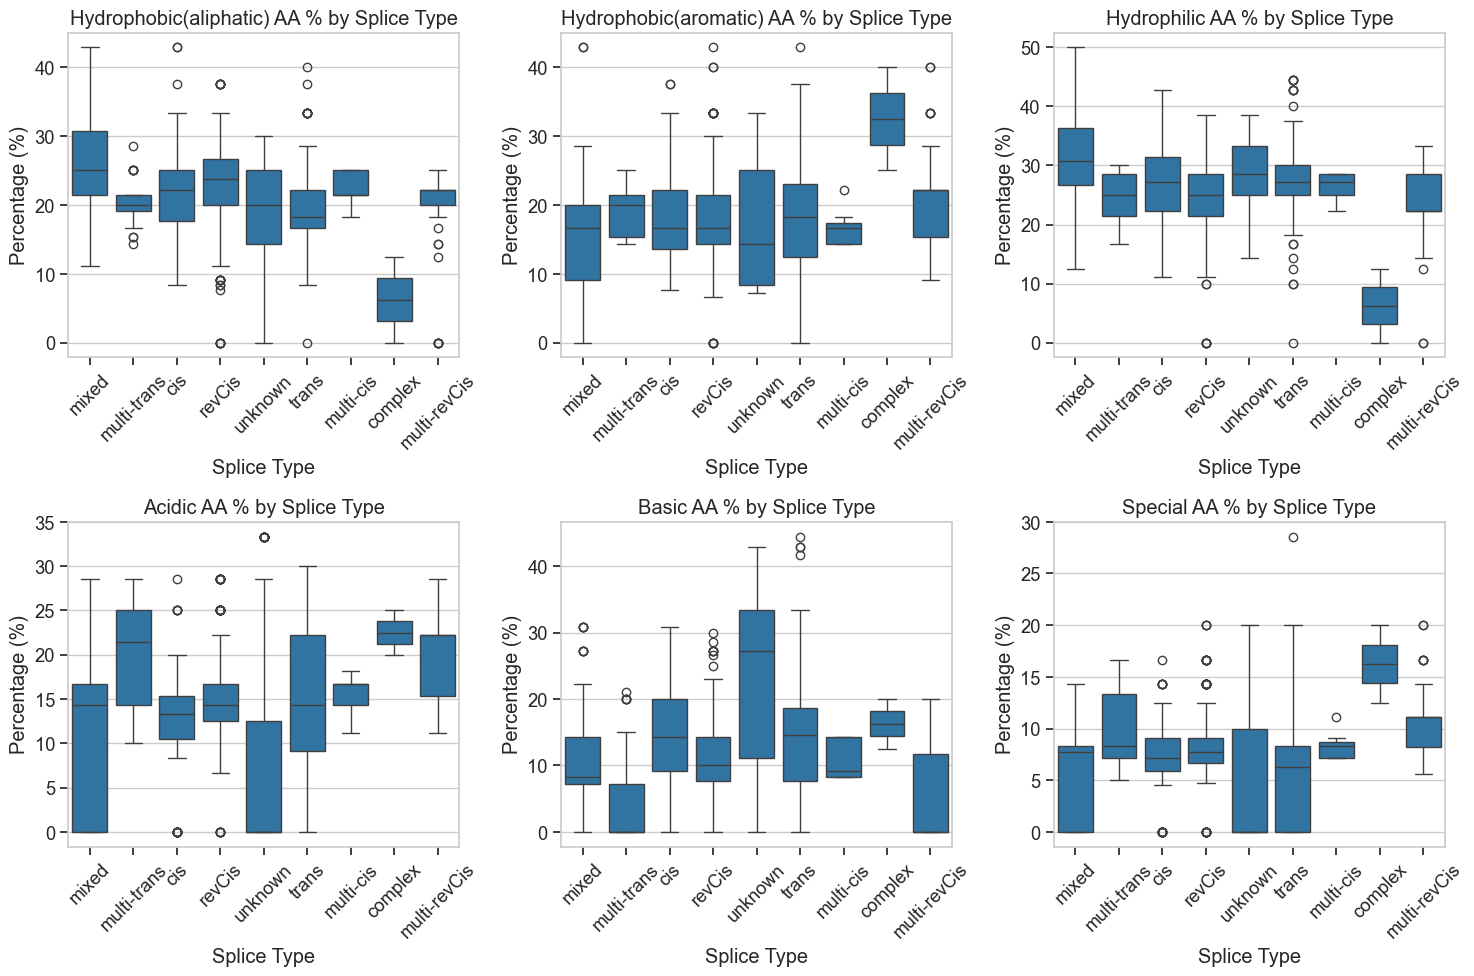


Statistical Analysis of Amino Acid Categories by Splice Type:
Hydrophobic(aliphatic): F=15.18, p-value=0.0000, Significant: Yes
Hydrophobic(aromatic): F=4.52, p-value=0.0000, Significant: Yes
Hydrophilic: F=19.73, p-value=0.0000, Significant: Yes
Acidic: F=60.33, p-value=0.0000, Significant: Yes
Basic: F=71.45, p-value=0.0000, Significant: Yes
Special: F=32.17, p-value=0.0000, Significant: Yes


In [60]:
# Analyze amino acid categories by splice type
if 'spliceCategory' in df.columns:
    # Create a function to calculate category percentages for a sequence
    def get_aa_category_percentages(seq):
        if not isinstance(seq, str) or len(seq) == 0:
            return {cat: 0 for cat in ['hydrophobic(aliphatic)','hydrophobic(aromatic)', 'hydrophilic', 'acidic', 'basic', 'special']}
        
        categories = {
            'hydrophobic(aliphatic)': ['A', 'V', 'L', 'I', 'M'],
            'hydrophobic(aromatic)': ['F', 'W', 'Y'],
            'hydrophilic': ['S', 'T', 'N', 'Q', 'C'],
            'acidic': ['D', 'E'],
            'basic': ['K', 'R', 'H'],
            'special': ['G', 'P']
        }
        
        # Initialize counters
        category_counts = {cat: 0 for cat in categories}
        
        # Converting to percentages normalizes for peptide length, allowing fair comparison between peptides of different sizes.

        for aa in seq:
            for cat, aa_list in categories.items():
                if aa in aa_list:
                    category_counts[cat] += 1
                    break
        
        # Calculates what percentage of the peptide belongs to each category
        return {cat: count / len(seq) * 100 for cat, count in category_counts.items()}
    
    # Applies the categorization function to every peptide sequence in the dataset
    category_percentages_by_seq = df['pepSeq'].apply(get_aa_category_percentages)
    
    # Creates new columns in the DataFrame for each category percentage
    for cat in ['hydrophobic(aliphatic)', 'hydrophobic(aromatic)', 'hydrophilic', 'acidic', 'basic', 'special']:
        df[f'{cat}_percent'] = category_percentages_by_seq.apply(lambda x: x[cat])
    
    # Visualize amino acid categories by splice type
    plt.figure(figsize=(15, 10))
    for i, cat in enumerate(['hydrophobic(aliphatic)_percent', 'hydrophobic(aromatic)_percent', 'hydrophilic_percent', 'acidic_percent', 
                            'basic_percent', 'special_percent'], 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x='spliceCategory', y=cat, data=df)
        plt.title(f'{cat.replace("_percent", "").capitalize()} AA % by Splice Type')
        plt.xlabel('Splice Type')
        plt.ylabel('Percentage (%)')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

    

        # Statistical analysis of amino acid categories by splice type
    print("\nStatistical Analysis of Amino Acid Categories by Splice Type:")
    try:
        from scipy import stats
        
        for cat in ['hydrophobic(aliphatic)_percent', 'hydrophobic(aromatic)_percent', 'hydrophilic_percent', 'acidic_percent', 
                   'basic_percent', 'special_percent']:
            # Perform ANOVA
            categories = df['spliceCategory'].unique()
            groups = [df[df['spliceCategory'] == splice_cat][cat].dropna() for splice_cat in categories]
            
            # Only perform test if we have data in at least 2 groups
            valid_groups = [g for g in groups if len(g) > 0]
            if len(valid_groups) >= 2:
                f_stat, p_val = stats.f_oneway(*valid_groups)
                print(f"{cat.replace('_percent', '').capitalize()}: F={f_stat:.2f}, p-value={p_val:.4f}, Significant: {'Yes' if p_val < 0.05 else 'No'}")
            else:
                print(f"{cat.replace('_percent', '').capitalize()}: Insufficient data for statistical testing")
    except ImportError:
        print("SciPy not available. Please install SciPy using 'pip install scipy' to run statistical tests.")

*F-statistic:
Measures the ratio of between-group variance to within-group variance
Higher F-values suggest stronger differences between groups
An F-value of 1 would suggest no difference between groups

p-value:
The probability of observing the data if the null hypothesis were true
Lower p-values indicate stronger evidence against the null hypothesis
The conventional threshold is p < 0.05 (5% significance level)

Significance:
If p < 0.05: We reject the null hypothesis and conclude that the amino acid category percentage differs significantly between at least some splice types
If p ≥ 0.05: We fail to reject the null hypothesis, meaning we don't have sufficient evidence of a difference*

In [61]:
#It shows the median percentage of each amino acid category for each splice type, 
# making it easier to compare them quantitatively rather than just visually from the box plots

def print_amino_acid_composition_insights(df):

    print("=" * 80)
    print("AMINO ACID COMPOSITION ANALYSIS ACROSS SPLICE TYPES")
    print("=" * 80)
    
    # Check if we have the necessary columns
    required_columns = ['spliceCategory', 'hydrophobic(aliphatic)_percent', 
                        'hydrophobic(aromatic)_percent', 'hydrophilic_percent',
                        'acidic_percent', 'basic_percent', 'special_percent']
    
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        print(f"Error: Missing required columns: {missing_columns}")
        return
    
    # Calculate median values for each category by splice type
    print("\nMedian Values by Splice Type:")
    print("-" * 50)
    
    splice_types = df['spliceCategory'].unique()
    categories = ['hydrophobic(aliphatic)', 'hydrophobic(aromatic)', 'hydrophilic', 
                 'acidic', 'basic', 'special']
    
    # Create a table of median values
    median_table = {}
    for splice_type in splice_types:
        subset = df[df['spliceCategory'] == splice_type]
        median_table[splice_type] = {}
        for cat in categories:
            col_name = f"{cat}_percent"
            if col_name in df.columns:
                median_table[splice_type][cat] = subset[col_name].median()
    
    # Print the table
    header = "Splice Type".ljust(15)
    for cat in categories:
        header += cat.capitalize().ljust(15)
    print(header)
    print("-" * 105)
    
    for splice_type in splice_types:
        row = splice_type.ljust(15)
        for cat in categories:
            if cat in median_table[splice_type]:
                value = f"{median_table[splice_type][cat]:.2f}%"
                row += value.ljust(15)
            else:
                row += "N/A".ljust(15)
        print(row)
    
print_amino_acid_composition_insights(df)

AMINO ACID COMPOSITION ANALYSIS ACROSS SPLICE TYPES

Median Values by Splice Type:
--------------------------------------------------
Splice Type    Hydrophobic(aliphatic)Hydrophobic(aromatic)Hydrophilic    Acidic         Basic          Special        
---------------------------------------------------------------------------------------------------------
mixed          25.00%         16.67%         30.77%         14.29%         8.33%          7.69%          
multi-trans    20.00%         20.00%         25.00%         21.43%         0.00%          8.33%          
cis            22.22%         16.67%         27.27%         13.33%         14.29%         7.14%          
revCis         23.81%         16.67%         25.00%         14.29%         10.00%         7.69%          
unknown        20.00%         14.29%         28.57%         0.00%          27.27%         0.00%          
trans          18.18%         18.18%         27.27%         14.29%         14.64%         6.25%          
multi


Calculating amino acid composition by splice type...


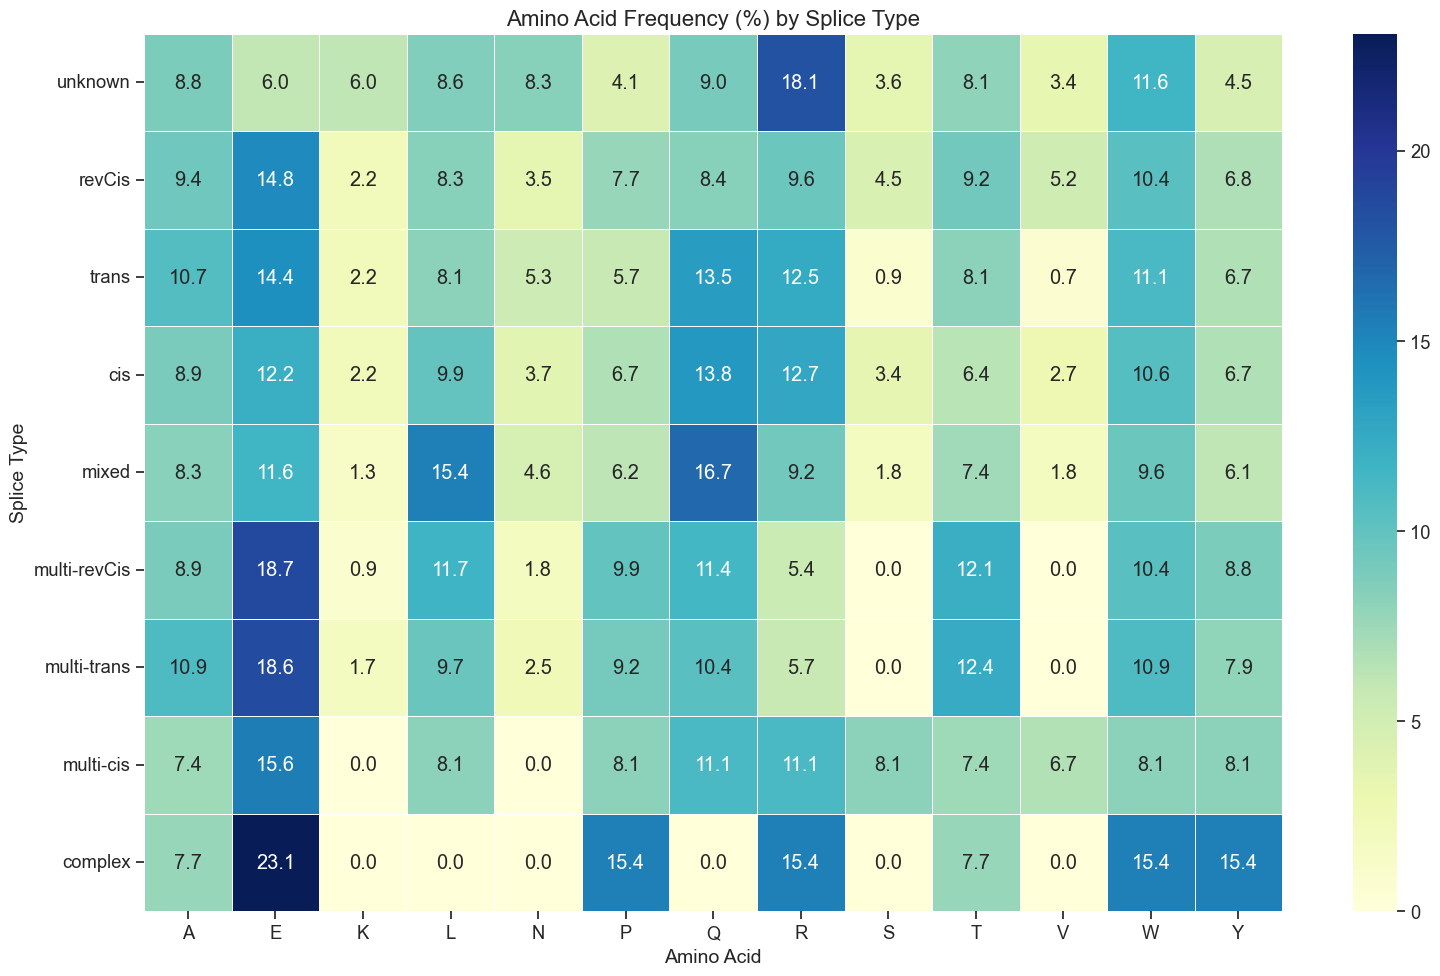


Calculating amino acid category percentages by splice type...


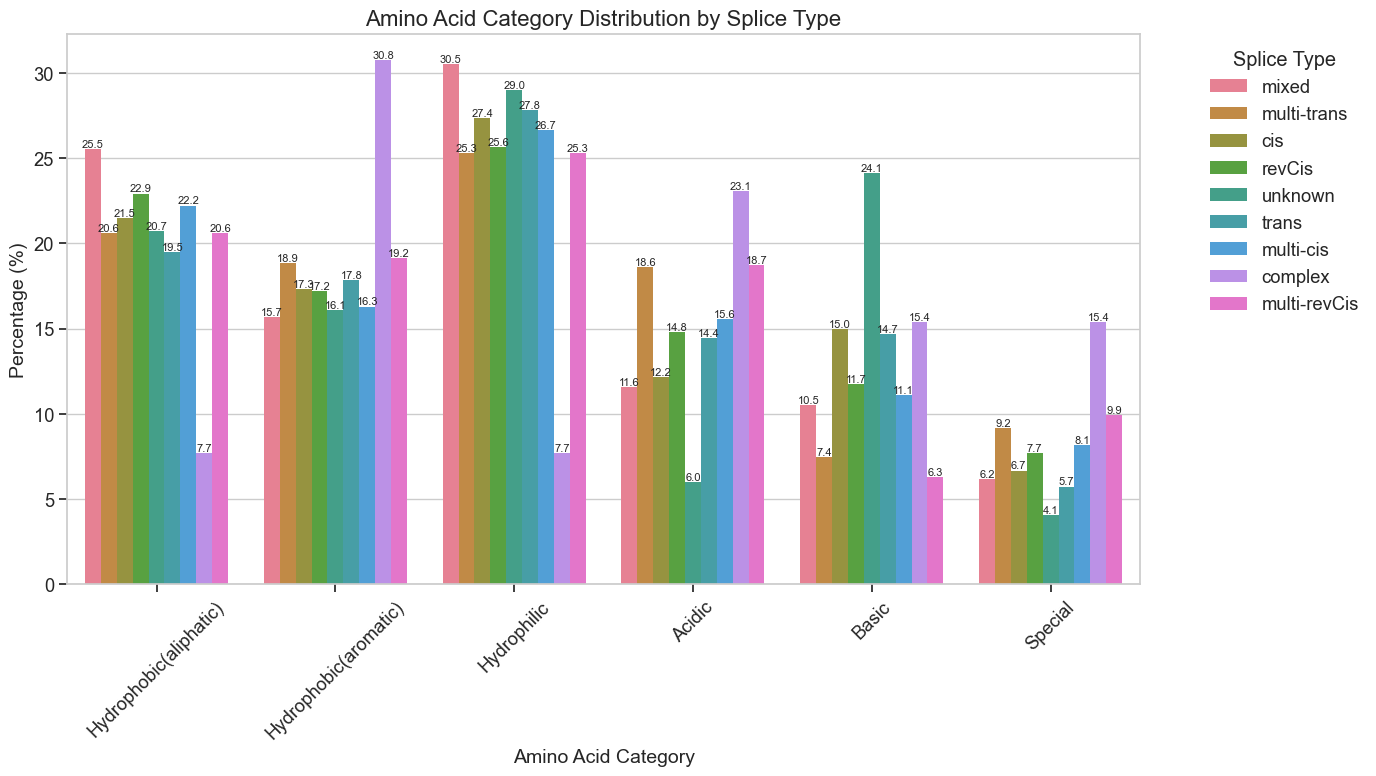

In [62]:
# Analyze relationship between splicing type and amino acid composition
def analyze_splicing_type_vs_composition(df):
    """Analyze how amino acid composition relates to splicing type"""
    # Check if required columns exist
    if 'pepSeq' not in df.columns:
        print("Error: 'pepSeq' column not found")
        return
    
    # Verify that spliceCategory column exists
    if 'spliceCategory' not in df.columns:
        print("Error: 'spliceCategory' column not found. Creating it now...")
        
        # Create simplified splice categories if not already done
        if 'spliceType' not in df.columns:
            print("Error: Neither 'spliceCategory' nor 'spliceType' column found")
            return
            
        # Define the categorization function based on your current categories
        def categorize_splice(x):
            if pd.isna(x):
                return 'unknown'
            if not isinstance(x, str):
                return 'unknown'
                
            # Single splice types
            if x == 'cis':
                return 'cis'
            if x == 'trans':
                return 'trans'
            if x == 'revCis':
                return 'revCis'
            
            # Multiple splice types
            if ';' in x:
                # Check for mixed types
                if 'cis' in x and 'trans' in x:
                    return 'mixed'
                if 'revCis' in x and 'trans' in x:
                    return 'mixed'
                
                # Same type multiple times
                if 'cis' in x and 'trans' not in x and 'revCis' not in x:
                    return 'multi-cis'
                if 'trans' in x and 'cis' not in x and 'revCis' not in x:
                    return 'multi-trans'
                if 'revCis' in x and 'cis' not in x and 'trans' not in x:
                    return 'multi-revCis'
            
            # Default case
            return 'complex'
        
        df['spliceCategory'] = df['spliceType'].apply(categorize_splice)
        print("Splice categories created.")
    
    # Use all categories including unknown
    df_analysis = df.copy()
    
    # Get unique splice types for analysis
    splice_types = df_analysis['spliceCategory'].unique()
    
    # Initialize dictionaries to store composition by splice type
    aa_composition_by_type = {splice_type: Counter() for splice_type in splice_types}
    total_length_by_type = {splice_type: 0 for splice_type in splice_types}
    
    # Calculate composition
    print("\nCalculating amino acid composition by splice type...")
    for _, row in df_analysis.iterrows():
        if pd.isna(row['pepSeq']) or pd.isna(row['spliceCategory']):
            continue
        
        splice_type = row['spliceCategory']
        seq = row['pepSeq']
        
        if isinstance(seq, str):
            aa_composition_by_type[splice_type].update(seq)
            total_length_by_type[splice_type] += len(seq)
    
    # Calculate frequencies
    aa_freq_by_type = {}
    for splice_type in splice_types:
        if total_length_by_type[splice_type] > 0:
            aa_freq_by_type[splice_type] = {
                aa: count / total_length_by_type[splice_type] * 100 
                for aa, count in aa_composition_by_type[splice_type].items()
            }
    
    # Plot amino acid frequencies by splice type
    all_aa = set()
    for freqs in aa_freq_by_type.values():
        all_aa.update(freqs.keys())
    all_aa = sorted(all_aa)
    
    # Create DataFrame for plotting
    plot_data = []
    for splice_type, freqs in aa_freq_by_type.items():
        for aa in all_aa:
            plot_data.append({
                'Splice Type': splice_type,
                'Amino Acid': aa,
                'Frequency (%)': freqs.get(aa, 0)
            })
    
    plot_df = pd.DataFrame(plot_data)
    
    # Plot heatmap
    plt.figure(figsize=(16, 10))
    pivot_table = plot_df.pivot(index='Splice Type', columns='Amino Acid', values='Frequency (%)')
    
    # Get splice category counts for ordering
    splice_category_counts = df['spliceCategory'].value_counts()
    
    # Reorder rows to match the frequency of splice categories
    if all(cat in pivot_table.index for cat in splice_category_counts.index):
        pivot_table = pivot_table.reindex(splice_category_counts.index)
    
    # Create heatmap with annotations
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5)
    plt.title('Amino Acid Frequency (%) by Splice Type', fontsize=16)
    plt.xlabel('Amino Acid', fontsize=14)
    plt.ylabel('Splice Type', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Define amino acid categories with more detailed hydrophobic classification
    categories = {
        'hydrophobic(aliphatic)': ['A', 'V', 'L', 'I', 'M'],
        'hydrophobic(aromatic)': ['F', 'W', 'Y'],
        'hydrophilic': ['S', 'T', 'N', 'Q', 'C'],
        'acidic': ['D', 'E'],
        'basic': ['K', 'R', 'H'],
        'special': ['G', 'P']
    }
    
    # Calculate category percentages by splice type
    print("\nCalculating amino acid category percentages by splice type...")
    category_pct_by_type = {}
    for splice_type, freqs in aa_freq_by_type.items():
        category_counts = {cat: 0 for cat in categories}
        for aa, freq in freqs.items():
            for cat, aa_list in categories.items():
                if aa in aa_list:
                    category_counts[cat] += freq
                    break
        category_pct_by_type[splice_type] = category_counts
    
    # Plot category percentages by splice type
    cat_data = []
    for splice_type, cat_pcts in category_pct_by_type.items():
        for cat, pct in cat_pcts.items():
            cat_data.append({
                'Splice Type': splice_type,
                'Category': cat.capitalize(),
                'Percentage': pct
            })
    
    cat_df = pd.DataFrame(cat_data)
    
    # Create bar plot
    plt.figure(figsize=(14, 8))
    
    # Use a custom color palette
    custom_palette = sns.color_palette("husl", len(splice_types))
    
    # Create the bar plot
    ax = sns.barplot(x='Category', y='Percentage', hue='Splice Type', data=cat_df, palette=custom_palette)
    
    # Customize the plot
    plt.title('Amino Acid Category Distribution by Splice Type', fontsize=16)
    plt.xlabel('Amino Acid Category', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.legend(title='Splice Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Return the calculated data for further analysis
    return aa_freq_by_type, category_pct_by_type

# Run the analysis
aa_freq_by_splice, category_pct_by_splice = analyze_splicing_type_vs_composition(df)

# Length Analysis 


Calculating peptide lengths...

Overall Peptide Length Statistics:
Mean length: 11.87
Median length: 12.00
Min length: 5
Max length: 26

Peptide Length Statistics by Splice Type:
                count       mean  median  min  max
spliceCategory                                    
cis               126  12.730159    13.0    6   22
complex             2   6.500000     6.5    5    8
mixed              71  10.704225    11.0    6   18
multi-cis          11  12.272727    12.0    9   14
multi-revCis       68  10.058824     9.0    5   18
multi-trans        27  14.925926    14.0   11   20
revCis            371  12.579515    13.0    5   21
trans             194  13.747423    12.0    6   26
unknown           475  10.585263    12.0    5   21


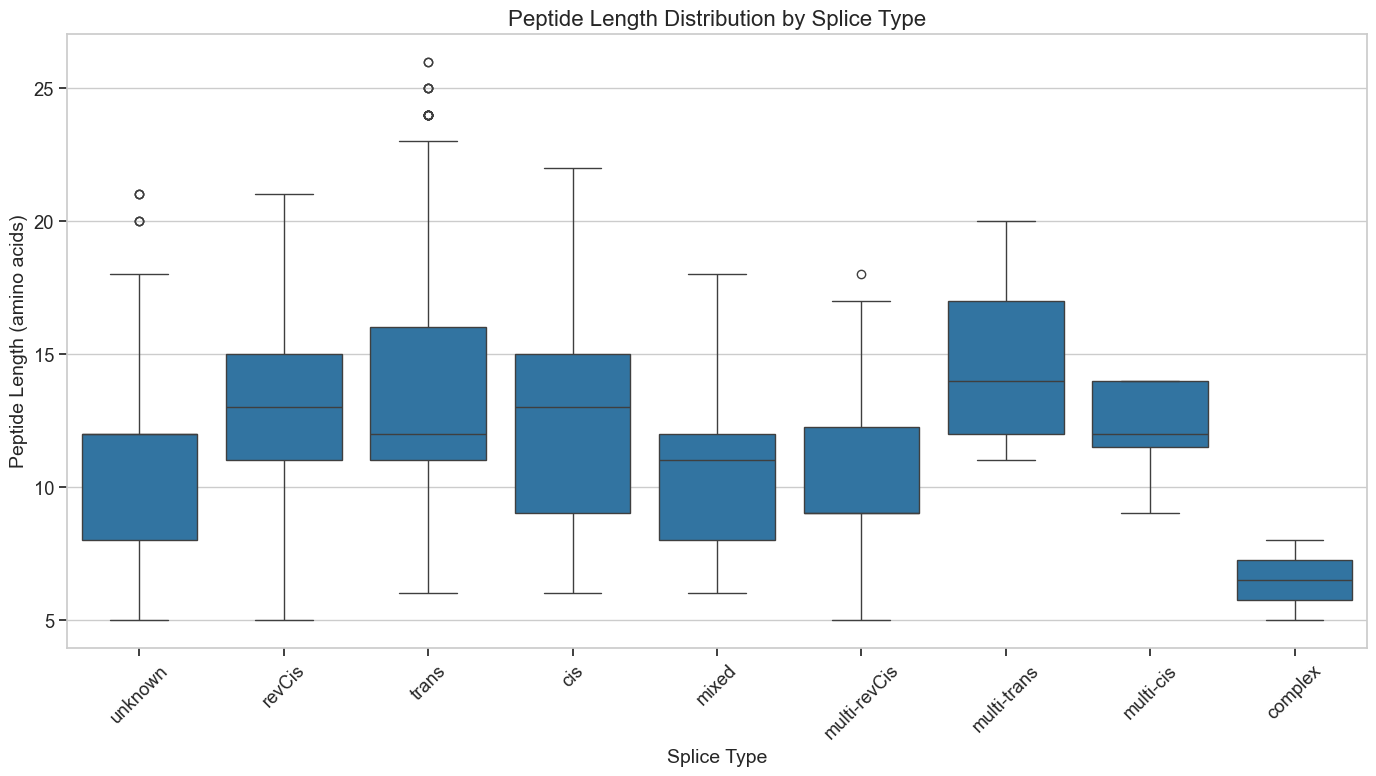

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


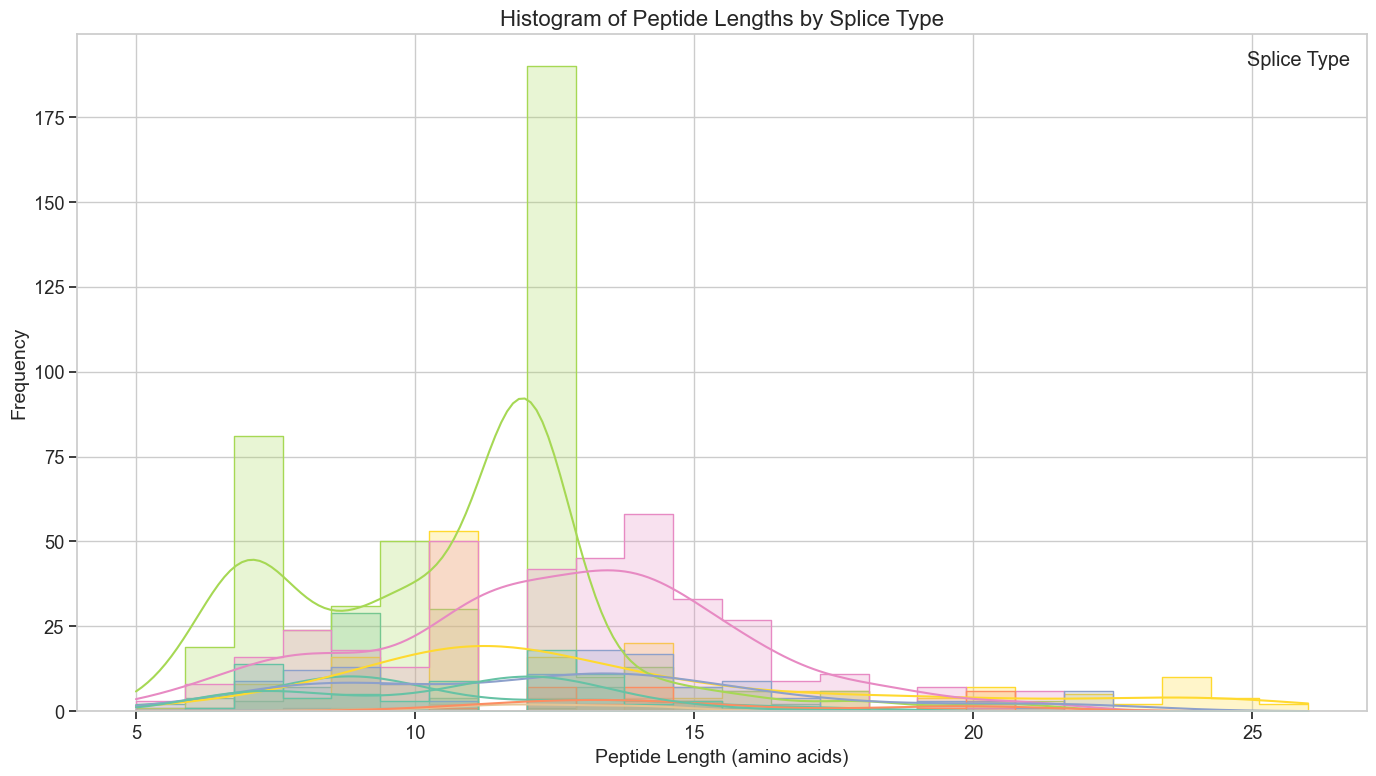

C:\Users\khush\AppData\Local\Temp\ipykernel_18328\2079696485.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='spliceCategory', y='pepLength', data=df_analysis,


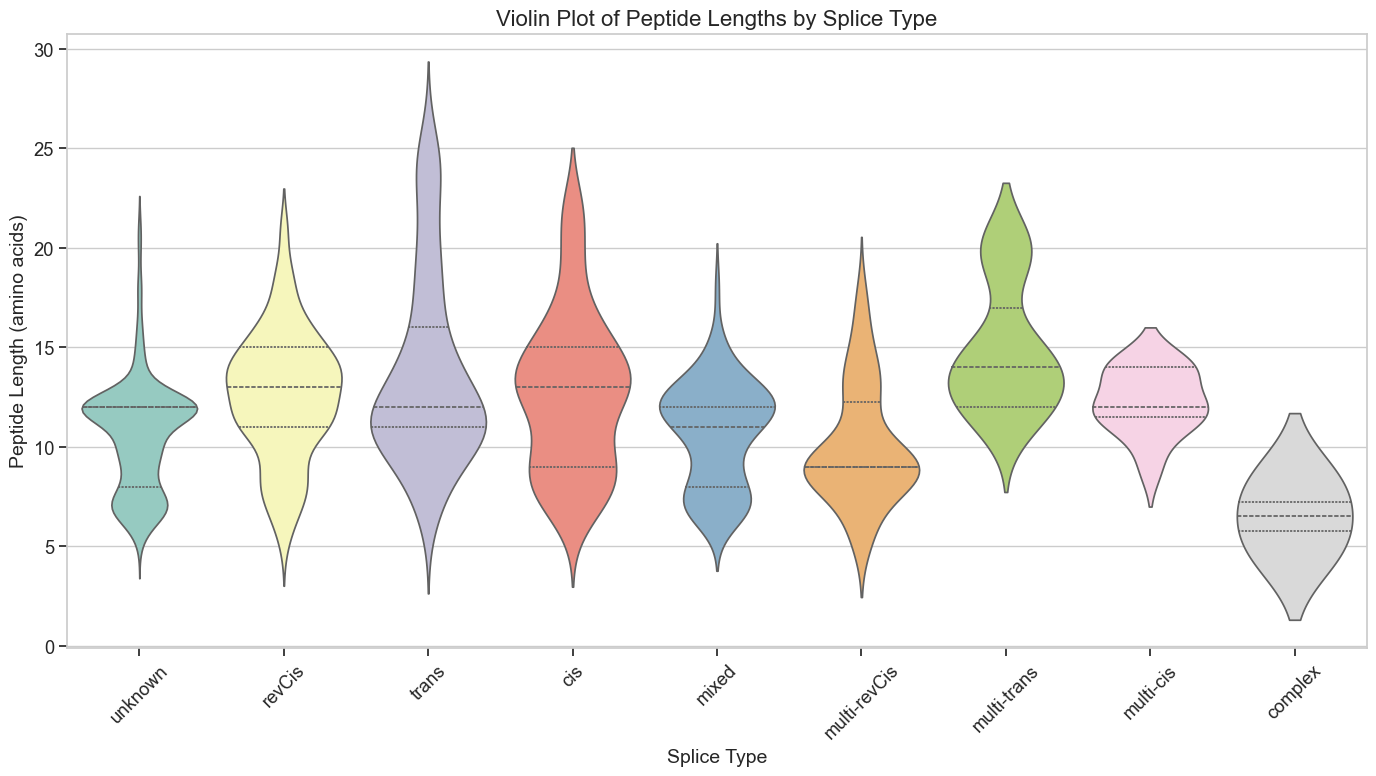


Statistical Analysis of Peptide Length by Splice Type:
ANOVA: F=25.93, p-value=0.0000, Significant: Yes

Tukey's HSD Post-hoc Test:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
         cis      complex  -6.2302 0.1954 -13.7288  1.2685  False
         cis        mixed  -2.0259 0.0019  -3.5873 -0.4646   True
         cis    multi-cis  -0.4574    1.0  -3.7654  2.8505  False
         cis multi-revCis  -2.6713    0.0  -4.2545 -1.0881   True
         cis  multi-trans   2.1958 0.0578  -0.0355  4.4271  False
         cis       revCis  -0.1506    1.0  -1.2355  0.9342  False
         cis        trans   1.0173  0.177  -0.1866  2.2211  False
         cis      unknown  -2.1449    0.0  -3.1992 -1.0905   True
     complex        mixed   4.2042  0.727  -3.3397 11.7481  False
     complex    multi-cis   5.7727 0.3947  -2.3152 13.8607  False
     comp

In [63]:
# Analyze peptide length distribution by splice type
def analyze_peptide_length_by_splice_type(df):
    """
    Analyze how peptide length varies across different splice types
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing pepSeq and spliceCategory columns
    """
    # Check if required columns exist
    if 'pepSeq' not in df.columns:
        print("Error: 'pepSeq' column not found")
        return
    
    if 'spliceCategory' not in df.columns:
        print("Error: 'spliceCategory' column not found")
        return
    
    # Calculate peptide lengths
    print("Calculating peptide lengths...")
    df['pepLength'] = df['pepSeq'].apply(lambda x: len(x) if isinstance(x, str) else 0)
    
    # Filter out zero-length peptides (likely missing data)
    df_analysis = df[df['pepLength'] > 0].copy()
    
    # Get overall length statistics
    print("\nOverall Peptide Length Statistics:")
    print(f"Mean length: {df_analysis['pepLength'].mean():.2f}")
    print(f"Median length: {df_analysis['pepLength'].median():.2f}")
    print(f"Min length: {df_analysis['pepLength'].min()}")
    print(f"Max length: {df_analysis['pepLength'].max()}")
    
    # Get length statistics by splice type
    print("\nPeptide Length Statistics by Splice Type:")
    length_stats = df_analysis.groupby('spliceCategory')['pepLength'].agg(['count', 'mean', 'median', 'min', 'max'])
    print(length_stats)
    
    # Create visualizations
    
    # 1. Box plot of peptide lengths by splice type
    plt.figure(figsize=(14, 8))
    
    # Order by frequency
    splice_category_counts = df['spliceCategory'].value_counts()
    order = splice_category_counts.index.tolist()
    
    # Create box plot
    sns.boxplot(x='spliceCategory', y='pepLength', data=df_analysis, order=order)
    
    # Add swarm plot for individual data points (if not too many)
    if len(df_analysis) < 1000:
        sns.swarmplot(x='spliceCategory', y='pepLength', data=df_analysis, 
                     order=order, color='black', alpha=0.5, size=3)
    
    # Customize plot
    plt.title('Peptide Length Distribution by Splice Type', fontsize=16)
    plt.xlabel('Splice Type', fontsize=14)
    plt.ylabel('Peptide Length (amino acids)', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 2. Histogram of peptide lengths
    plt.figure(figsize=(14, 8))
    
    # Create histogram with KDE
    sns.histplot(data=df_analysis, x='pepLength', hue='spliceCategory', 
                element='step', kde=True, palette='Set2')
    
    # Customize plot
    plt.title('Histogram of Peptide Lengths by Splice Type', fontsize=16)
    plt.xlabel('Peptide Length (amino acids)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend(title='Splice Type')
    plt.tight_layout()
    plt.show()
    
    # 3. Violin plot for another perspective
    plt.figure(figsize=(14, 8))
    
    # Create violin plot
    sns.violinplot(x='spliceCategory', y='pepLength', data=df_analysis, 
                  order=order, palette='Set3', inner='quartile')
    
    # Customize plot
    plt.title('Violin Plot of Peptide Lengths by Splice Type', fontsize=16)
    plt.xlabel('Splice Type', fontsize=14)
    plt.ylabel('Peptide Length (amino acids)', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 4. Statistical analysis
    print("\nStatistical Analysis of Peptide Length by Splice Type:")
    try:
        from scipy import stats
        
        # Perform ANOVA
        categories = df_analysis['spliceCategory'].unique()
        groups = [df_analysis[df_analysis['spliceCategory'] == splice_cat]['pepLength'] for splice_cat in categories]
        
        # Only perform test if we have data in at least 2 groups
        valid_groups = [g for g in groups if len(g) > 0]
        if len(valid_groups) >= 2:
            f_stat, p_val = stats.f_oneway(*valid_groups)
            print(f"ANOVA: F={f_stat:.2f}, p-value={p_val:.4f}, Significant: {'Yes' if p_val < 0.05 else 'No'}")
            
            # If significant, perform post-hoc test
            if p_val < 0.05 and len(valid_groups) > 2:
                try:
                    from statsmodels.stats.multicomp import pairwise_tukeyhsd
                    
                    # Prepare data for Tukey's test
                    lengths = df_analysis['pepLength'].values
                    groups = df_analysis['spliceCategory'].values
                    
                    # Perform Tukey's test
                    tukey = pairwise_tukeyhsd(lengths, groups, alpha=0.05)
                    print("\nTukey's HSD Post-hoc Test:")
                    print(tukey)
                except ImportError:
                    print("statsmodels not available. Cannot perform post-hoc test.")
        else:
            print("Insufficient data for statistical testing")
    except ImportError:
        print("SciPy not available. Please install SciPy using 'pip install scipy' to run statistical tests.")
    
    return length_stats

# Run the analysis
length_stats_by_splice = analyze_peptide_length_by_splice_type(df)

# Length Analysis Vs Splicing

<>:22: SyntaxWarning: invalid escape sequence '\P'
<>:22: SyntaxWarning: invalid escape sequence '\P'
C:\Users\khush\AppData\Local\Temp\ipykernel_18328\1938307693.py:22: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('INPUT\ProteasomeDB.csv')


Creating spliceCategory from spliceType...
spliceCategory column created.
Calculating peptide lengths...

Peptide Length Statistics by Splice Type:


,count,mean,median,min,max,std
spliceCategory,,,,,,
cis,126,12.730159,13.0,6,22,3.986804
complex,2,6.500000,6.5,5,8,2.121320
mixed,71,10.704225,11.0,6,18,2.615309
multi-cis,11,12.272727,12.0,9,14,1.618080
multi-revCis,68,10.058824,9.0,5,18,2.966894
multi-trans,27,14.925926,14.0,11,20,3.161377
revCis,371,12.579515,13.0,5,21,3.237619
trans,194,13.747423,12.0,6,26,4.829005
unknown,475,10.585263,12.0,5,21,2.754856



Splice Categories Sorted by Median Peptide Length:


,count,mean,median,min,max,std
spliceCategory,,,,,,
complex,2,6.500000,6.5,5,8,2.121320
multi-revCis,68,10.058824,9.0,5,18,2.966894
mixed,71,10.704225,11.0,6,18,2.615309
multi-cis,11,12.272727,12.0,9,14,1.618080
trans,194,13.747423,12.0,6,26,4.829005
unknown,475,10.585263,12.0,5,21,2.754856
cis,126,12.730159,13.0,6,22,3.986804
revCis,371,12.579515,13.0,5,21,3.237619
multi-trans,27,14.925926,14.0,11,20,3.161377



Spearman correlation between splice type frequency and median peptide length: 0.358 (p-value: 0.345)
Interpretation: Not significant correlation


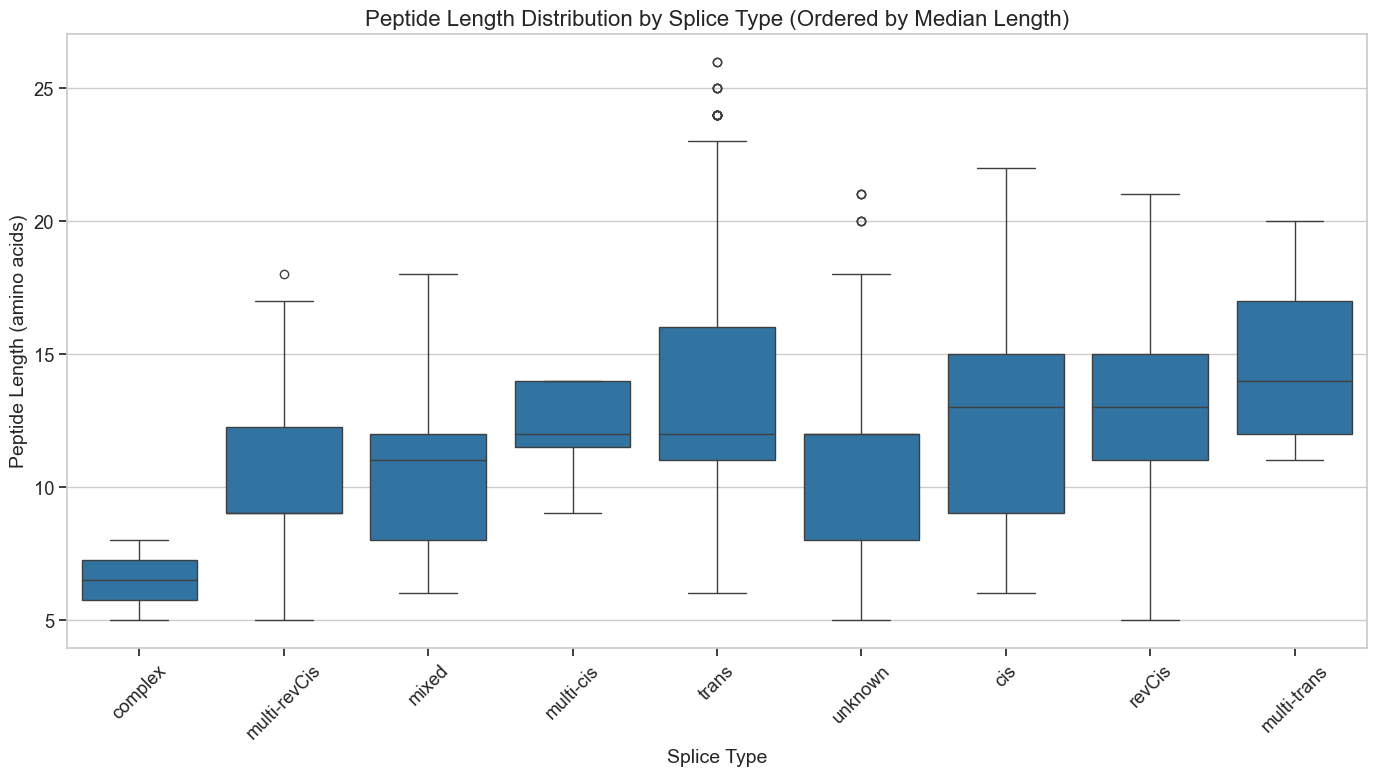

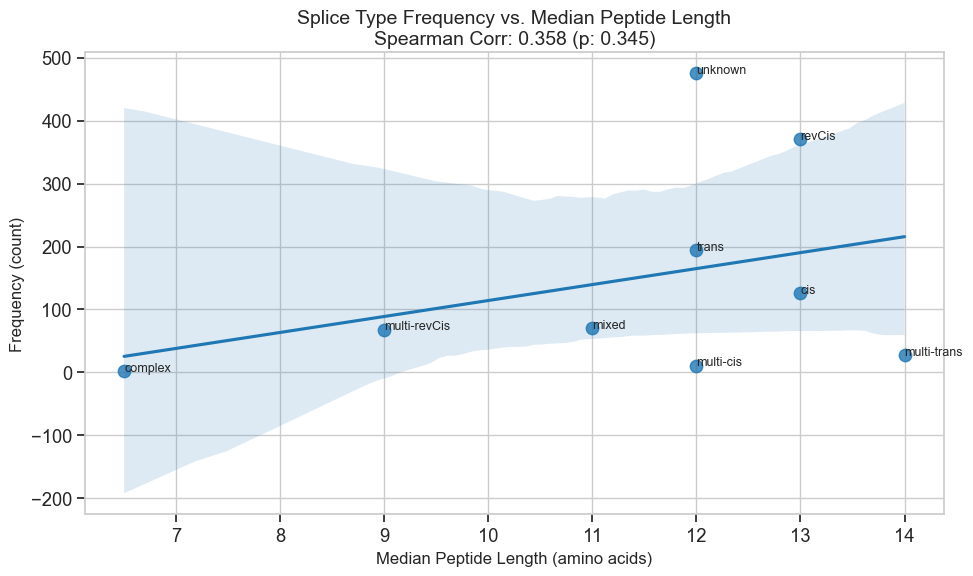

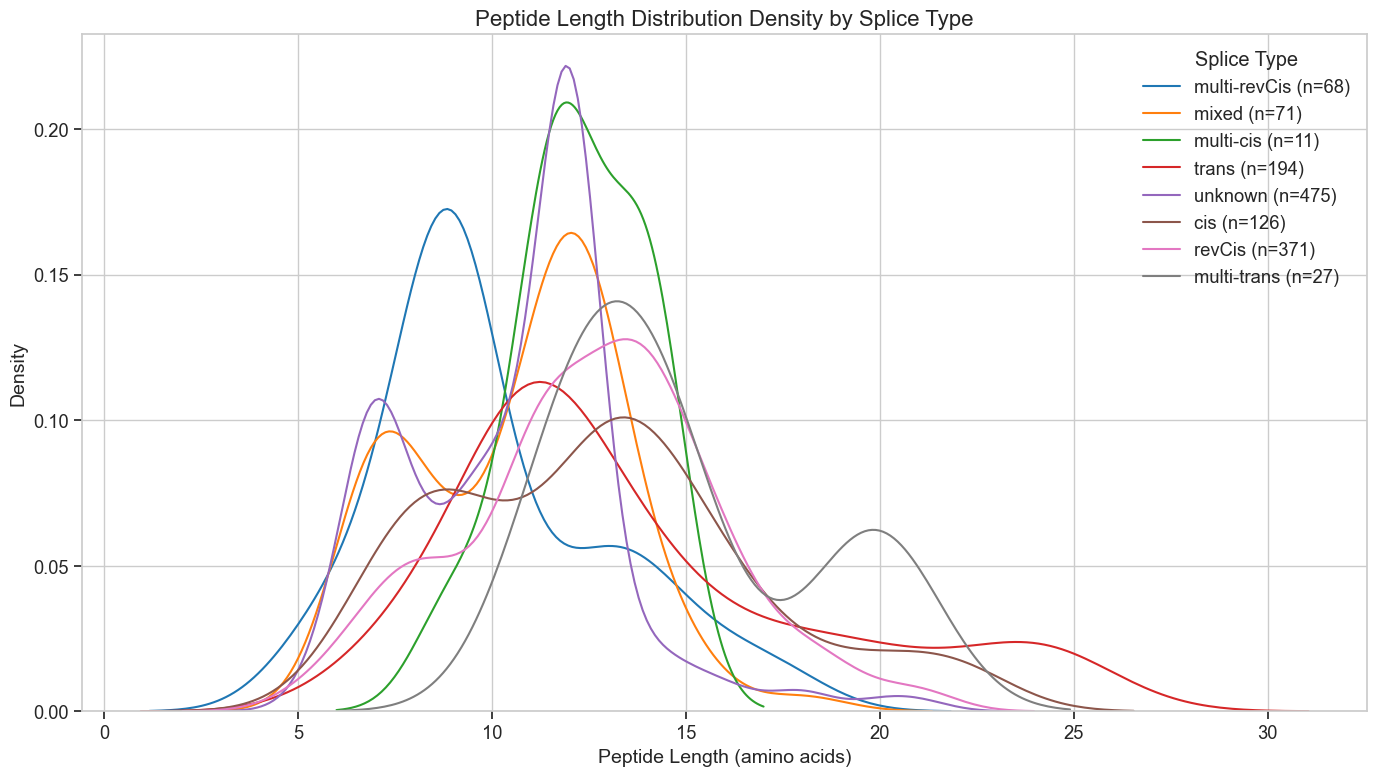


Statistical Analysis of Peptide Length by Splice Type:
ANOVA: F=25.93, p-value=0.0000, Significant: Yes
Effect size (eta-squared): 0.1344
Interpretation: Medium effect

Tukey's HSD Post-hoc Test:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
         cis      complex  -6.2302 0.1954 -13.7288  1.2685  False
         cis        mixed  -2.0259 0.0019  -3.5873 -0.4646   True
         cis    multi-cis  -0.4574    1.0  -3.7654  2.8505  False
         cis multi-revCis  -2.6713    0.0  -4.2545 -1.0881   True
         cis  multi-trans   2.1958 0.0578  -0.0355  4.4271  False
         cis       revCis  -0.1506    1.0  -1.2355  0.9342  False
         cis        trans   1.0173  0.177  -0.1866  2.2211  False
         cis      unknown  -2.1449    0.0  -3.1992 -1.0905   True
     complex        mixed   4.2042  0.727  -3.3397 11.7481  False
     comple

,0.10,0.25,0.50,0.75,0.90
spliceCategory,,,,,
cis,8.0,9.00,13.0,15.00,18.5
complex,5.3,5.75,6.5,7.25,7.7
mixed,7.0,8.00,11.0,12.00,13.0
multi-cis,11.0,11.50,12.0,14.00,14.0
multi-revCis,7.0,9.00,9.0,12.25,14.3
multi-trans,12.0,12.00,14.0,17.00,20.0
revCis,8.0,11.00,13.0,15.00,16.0
trans,9.0,11.00,12.0,16.00,22.0
unknown,7.0,8.00,12.0,12.00,13.0



Percentage of peptides in each length range by splice type:


,0-5,6-10,11-15,16-20,21-25,26-30,31-inf
mixed,0.000000,38.028169,60.563380,1.408451,0.000000,0.000000,0.0
multi-trans,0.000000,0.000000,74.074074,25.925926,0.000000,0.000000,0.0
cis,0.000000,34.126984,44.444444,15.873016,5.555556,0.000000,0.0
revCis,0.808625,21.293801,61.455526,14.824798,1.617251,0.000000,0.0
unknown,0.210526,43.157895,52.631579,3.368421,0.631579,0.000000,0.0
trans,0.000000,19.072165,53.608247,14.948454,11.340206,1.030928,0.0
multi-cis,0.000000,9.090909,90.909091,0.000000,0.000000,0.000000,0.0
complex,50.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.0
multi-revCis,2.941176,64.705882,26.470588,5.882353,0.000000,0.000000,0.0


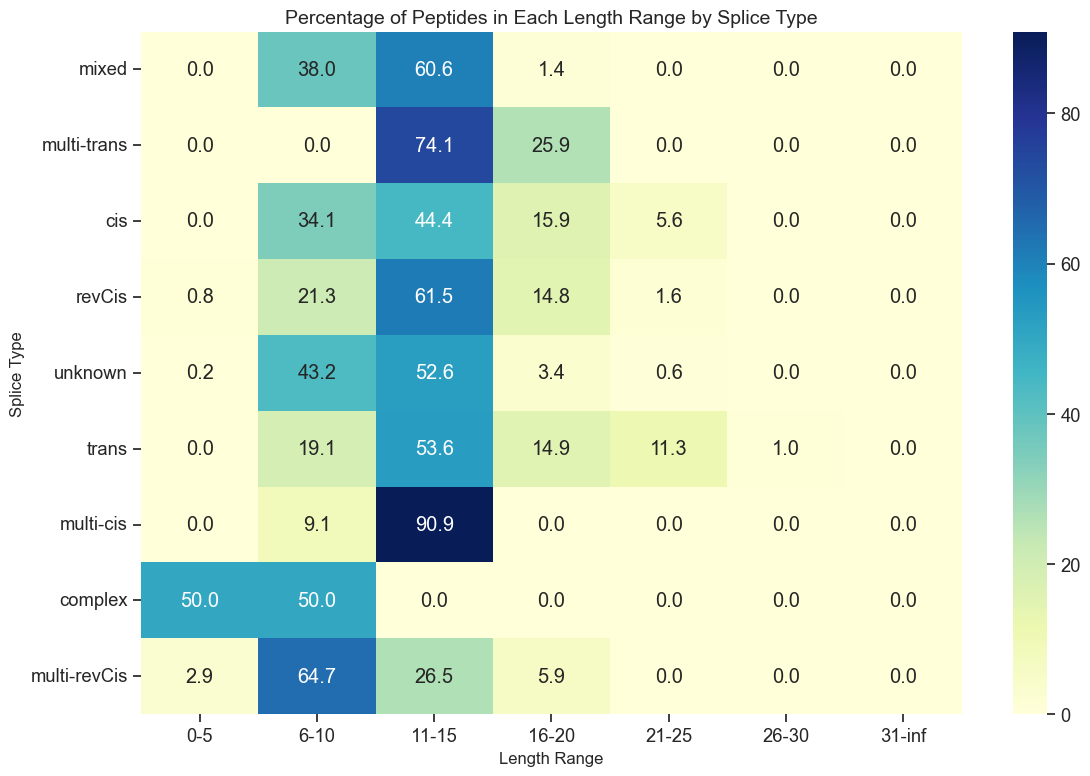


Predicting splice type from peptide length using logistic regression:


c:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation accuracy: 0.459 ± 0.036
Baseline accuracy (most frequent class): 0.353


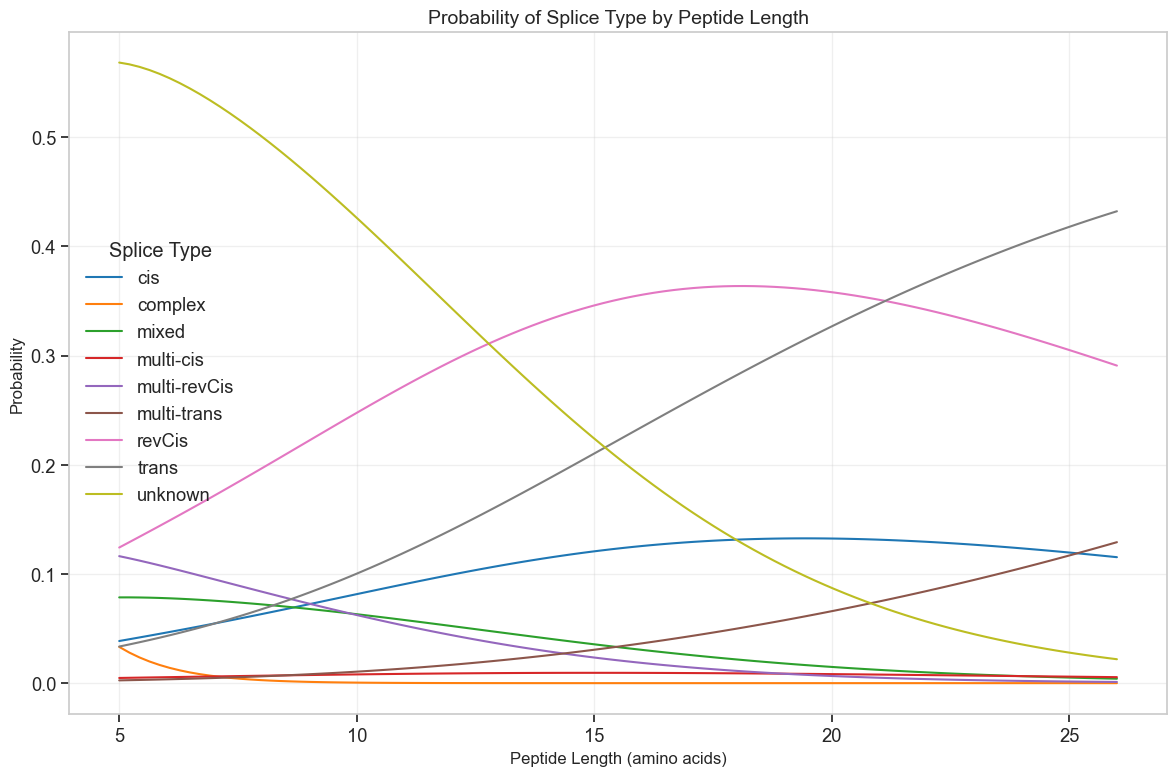


=== INTERPRETATION OF RESULTS ===
Based on the analysis, we can assess whether peptide length could be a reason for splicing:

1. Statistical significance: There are statistically significant differences in peptide lengths between splice types.
   - The effect size is 0.1344, which indicates a medium effect.
   - 15 out of 36 pairwise comparisons showed significant differences.

2. Length thresholds:
   - mixed: 60.6% of peptides are in the 11-15 amino acid range.
   - multi-trans: 74.1% of peptides are in the 11-15 amino acid range.
   - revCis: 61.5% of peptides are in the 11-15 amino acid range.
   - unknown: 52.6% of peptides are in the 11-15 amino acid range.
   - trans: 53.6% of peptides are in the 11-15 amino acid range.
   - multi-cis: 90.9% of peptides are in the 11-15 amino acid range.
   - multi-revCis: 64.7% of peptides are in the 6-10 amino acid range.

3. Predictive power: Peptide length has strong predictive power for splice type.
   - Model accuracy: 0.459 vs. baseline

In [64]:

from scipy import stats
from collections import Counter

# Set up the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Define the function to interpret effect size
def interpret_effect_size(eta_squared):
    """Interpret the effect size based on common guidelines"""
    if eta_squared < 0.01:
        return "Negligible effect"
    elif eta_squared < 0.06:
        return "Small effect"
    elif eta_squared < 0.14:
        return "Medium effect"
    else:
        return "Large effect"

# Load your data

df = pd.read_csv('INPUT\ProteasomeDB.csv')

# If you need to create a spliceCategory column from spliceType
if 'spliceCategory' not in df.columns and 'spliceType' in df.columns:
    print("Creating spliceCategory from spliceType...")
    
    # Define the categorization function
    def categorize_splice(x):
        if pd.isna(x):
            return 'unknown'
        if not isinstance(x, str):
            return 'unknown'
            
        # Single splice types
        if x == 'cis':
            return 'cis'
        if x == 'trans':
            return 'trans'
        if x == 'revCis':
            return 'revCis'
        
        # Multiple splice types
        if ';' in x:
            # Check for mixed types
            if 'cis' in x and 'trans' in x:
                return 'mixed'
            if 'revCis' in x and 'trans' in x:
                return 'mixed'
            
            # Same type multiple times
            if 'cis' in x and 'trans' not in x and 'revCis' not in x:
                return 'multi-cis'
            if 'trans' in x and 'cis' not in x and 'revCis' not in x:
                return 'multi-trans'
            if 'revCis' in x and 'cis' not in x and 'trans' not in x:
                return 'multi-revCis'
        
        # Default case
        return 'complex'
    
    df['spliceCategory'] = df['spliceType'].apply(categorize_splice)
    print("spliceCategory column created.")

# Calculate peptide lengths if not already done
if 'pepLength' not in df.columns:
    print("Calculating peptide lengths...")
    df['pepLength'] = df['pepSeq'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Filter out zero-length peptides (likely missing data)
df_analysis = df[df['pepLength'] > 0].copy()

# Get length statistics by splice type
print("\nPeptide Length Statistics by Splice Type:")
length_stats = df_analysis.groupby('spliceCategory')['pepLength'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
display(length_stats)

# Sort splice categories by median peptide length
sorted_by_length = length_stats.sort_values('median')
print("\nSplice Categories Sorted by Median Peptide Length:")
display(sorted_by_length)

# Calculate correlation between peptide length and splice type frequency
splice_counts = df_analysis['spliceCategory'].value_counts()
splice_median_lengths = length_stats['median']

# Create a DataFrame with both counts and median lengths
correlation_df = pd.DataFrame({
    'count': splice_counts,
    'median_length': splice_median_lengths
}).dropna()

# Calculate Spearman correlation (non-parametric)
if len(correlation_df) > 1:
    corr, p_value = stats.spearmanr(correlation_df['count'], correlation_df['median_length'])
    print(f"\nSpearman correlation between splice type frequency and median peptide length: {corr:.3f} (p-value: {p_value:.3f})")
    print(f"Interpretation: {'Significant' if p_value < 0.05 else 'Not significant'} correlation")

# Create visualizations

# 1. Box plot of peptide lengths by splice type, ordered by median length
plt.figure(figsize=(14, 8))
order = sorted_by_length.index.tolist()
sns.boxplot(x='spliceCategory', y='pepLength', data=df_analysis, order=order)

# Customize plot
plt.title('Peptide Length Distribution by Splice Type (Ordered by Median Length)', fontsize=16)
plt.xlabel('Splice Type', fontsize=14)
plt.ylabel('Peptide Length (amino acids)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Scatter plot of splice type frequency vs. median peptide length
if len(correlation_df) > 1:
    plt.figure(figsize=(10, 6))
    sns.regplot(x='median_length', y='count', data=correlation_df, scatter_kws={'s': 80})
    
    # Add labels to points
    for idx, row in correlation_df.iterrows():
        plt.text(row['median_length'], row['count'], idx, fontsize=9)
    
    plt.title(f'Splice Type Frequency vs. Median Peptide Length\nSpearman Corr: {corr:.3f} (p: {p_value:.3f})', fontsize=14)
    plt.xlabel('Median Peptide Length (amino acids)', fontsize=12)
    plt.ylabel('Frequency (count)', fontsize=12)
    plt.tight_layout()
    plt.show()

# 3. Length distribution density plot by splice type
plt.figure(figsize=(14, 8))
for splice_type in order:
    subset = df_analysis[df_analysis['spliceCategory'] == splice_type]
    if len(subset) > 5:  # Only plot if we have enough data points
        sns.kdeplot(subset['pepLength'], label=f"{splice_type} (n={len(subset)})")

plt.title('Peptide Length Distribution Density by Splice Type', fontsize=16)
plt.xlabel('Peptide Length (amino acids)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Splice Type')
plt.tight_layout()
plt.show()

# 4. Statistical analysis - ANOVA and effect size
print("\nStatistical Analysis of Peptide Length by Splice Type:")

# Perform ANOVA
categories = df_analysis['spliceCategory'].unique()
groups = [df_analysis[df_analysis['spliceCategory'] == splice_cat]['pepLength'] for splice_cat in categories]

# Only perform test if we have data in at least 2 groups
valid_groups = [g for g in groups if len(g) > 0]
if len(valid_groups) >= 2:
    f_stat, p_val = stats.f_oneway(*valid_groups)
    print(f"ANOVA: F={f_stat:.2f}, p-value={p_val:.4f}, Significant: {'Yes' if p_val < 0.05 else 'No'}")
    
    # Calculate effect size (eta-squared)
    # Sum of squares between groups
    grand_mean = df_analysis['pepLength'].mean()
    ss_between = sum(len(g) * ((g.mean() - grand_mean) ** 2) for g in valid_groups)
    # Total sum of squares
    ss_total = sum((df_analysis['pepLength'] - grand_mean) ** 2)
    # Eta-squared
    eta_squared = ss_between / ss_total if ss_total > 0 else 0
    print(f"Effect size (eta-squared): {eta_squared:.4f}")
    print(f"Interpretation: {interpret_effect_size(eta_squared)}")
    
    # If significant, perform post-hoc test
    if p_val < 0.05 and len(valid_groups) > 2:
        try:
            from statsmodels.stats.multicomp import pairwise_tukeyhsd
            
            # Prepare data for Tukey's test
            lengths = df_analysis['pepLength'].values
            groups = df_analysis['spliceCategory'].values
            
            # Perform Tukey's test
            tukey = pairwise_tukeyhsd(lengths, groups, alpha=0.05)
            print("\nTukey's HSD Post-hoc Test:")
            print(tukey)
            
            # Create a heatmap of p-values from pairwise comparisons
            try:
                # Extract p-values from Tukey results
                unique_groups = np.unique(groups)
                p_values = np.ones((len(unique_groups), len(unique_groups)))
                
                for i, (group1, group2, reject, _, _) in enumerate(zip(tukey.groupsunique[tukey.pairindices[:,0]],
                                                                     tukey.groupsunique[tukey.pairindices[:,1]],
                                                                     tukey.reject,
                                                                     tukey.meandiffs,
                                                                     tukey.confint)):
                    idx1 = np.where(unique_groups == group1)[0][0]
                    idx2 = np.where(unique_groups == group2)[0][0]
                    # Use 0.001 for significant differences, 1.0 for non-significant
                    p_values[idx1, idx2] = 0.001 if reject else 0.5
                    p_values[idx2, idx1] = 0.001 if reject else 0.5
                
                # Create heatmap
                plt.figure(figsize=(12, 10))
                mask = np.triu(np.ones_like(p_values, dtype=bool))
                sns.heatmap(p_values, annot=False, mask=mask, cmap='coolwarm_r',
                           xticklabels=unique_groups, yticklabels=unique_groups, vmin=0, vmax=1)
                plt.title('Pairwise Comparison of Peptide Lengths Between Splice Types\n(Dark = Significant Difference)', fontsize=14)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"Could not create pairwise comparison heatmap: {e}")
        except ImportError:
            print("statsmodels not available. Cannot perform post-hoc test.")
else:
    print("Insufficient data for statistical testing")

# 5. Length threshold analysis
print("\nAnalyzing potential length thresholds for splice types:")

# For each splice type, find the 10th, 25th, 50th, 75th, and 90th percentiles
percentiles = df_analysis.groupby('spliceCategory')['pepLength'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
percentiles = percentiles.unstack()
display(percentiles)

# Check for potential length thresholds
# For each splice type, calculate what percentage of peptides fall within certain length ranges
length_ranges = [(0, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30), (31, float('inf'))]

range_distribution = {}
for splice_type in df_analysis['spliceCategory'].unique():
    subset = df_analysis[df_analysis['spliceCategory'] == splice_type]
    distribution = {}
    for start, end in length_ranges:
        count = subset[(subset['pepLength'] >= start) & (subset['pepLength'] <= end)].shape[0]
        percentage = count / len(subset) * 100 if len(subset) > 0 else 0
        distribution[f"{start}-{end}"] = percentage
    range_distribution[splice_type] = distribution

# Convert to DataFrame for easier viewing
range_df = pd.DataFrame(range_distribution).T
print("\nPercentage of peptides in each length range by splice type:")
display(range_df)

# Create heatmap of length range distributions
plt.figure(figsize=(12, 8))
sns.heatmap(range_df, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Percentage of Peptides in Each Length Range by Splice Type', fontsize=14)
plt.xlabel('Length Range', fontsize=12)
plt.ylabel('Splice Type', fontsize=12)
plt.tight_layout()
plt.show()

# 6. Logistic regression to predict splice type from length
try:
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import LabelEncoder
    
    print("\nPredicting splice type from peptide length using logistic regression:")
    
    # Encode splice categories
    le = LabelEncoder()
    y = le.fit_transform(df_analysis['spliceCategory'])
    X = df_analysis[['pepLength']].values
    
    # Only perform if we have enough data
    if len(np.unique(y)) > 1 and len(X) > 20:
        # Create and evaluate model
        model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
        scores = cross_val_score(model, X, y, cv=5 if len(X) > 50 else 3, scoring='accuracy')
        
        print(f"Cross-validation accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")
        print(f"Baseline accuracy (most frequent class): {np.max(np.bincount(y) / len(y)):.3f}")
        
        # Fit model on all data to get coefficients
        model.fit(X, y)
        
        # Create prediction probability curves
        plt.figure(figsize=(12, 8))
        
        # Create range of lengths to predict on
        length_range = np.linspace(df_analysis['pepLength'].min(), df_analysis['pepLength'].max(), 100).reshape(-1, 1)
        
        # Get prediction probabilities
        probs = model.predict_proba(length_range)
        
        # Plot probability curves for each class
        for i, splice_type in enumerate(le.classes_):
            plt.plot(length_range, probs[:, i], label=splice_type)
        
        plt.title('Probability of Splice Type by Peptide Length', fontsize=14)
        plt.xlabel('Peptide Length (amino acids)', fontsize=12)
        plt.ylabel('Probability', fontsize=12)
        plt.legend(title='Splice Type')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("Insufficient data for logistic regression analysis")
except ImportError:
    print("scikit-learn not available. Cannot perform logistic regression analysis.")

# 7. Interpretation of results
print("\n=== INTERPRETATION OF RESULTS ===")
print("Based on the analysis, we can assess whether peptide length could be a reason for splicing:")

# Check if ANOVA was significant
if 'p_val' in locals() and p_val < 0.05:
    print("\n1. Statistical significance: There are statistically significant differences in peptide lengths between splice types.")
    print(f"   - The effect size is {eta_squared:.4f}, which indicates a {interpret_effect_size(eta_squared).lower()}.")
    
    # Check if we have tukey results
    if 'tukey' in locals():
        significant_pairs = sum(tukey.reject)
        total_pairs = len(tukey.reject)
        print(f"   - {significant_pairs} out of {total_pairs} pairwise comparisons showed significant differences.")
else:
    print("\n1. Statistical significance: There are NO statistically significant differences in peptide lengths between splice types.")
    print("   - This suggests peptide length alone may not be a determining factor for splice type.")

# Check for length thresholds
print("\n2. Length thresholds:")
for splice_type, row in range_df.iterrows():
    max_range = row.idxmax()
    max_pct = row.max()
    if max_pct > 50:  # If more than 50% of peptides fall in a specific range
        print(f"   - {splice_type}: {max_pct:.1f}% of peptides are in the {max_range} amino acid range.")

# Check logistic regression results
if 'scores' in locals():
    baseline = np.max(np.bincount(y) / len(y))
    if np.mean(scores) > baseline + 0.1:  # If model is at least 10% better than baseline
        print("\n3. Predictive power: Peptide length has strong predictive power for splice type.")
        print(f"   - Model accuracy: {np.mean(scores):.3f} vs. baseline: {baseline:.3f}")
    elif np.mean(scores) > baseline + 0.05:  # If model is at least 5% better than baseline
        print("\n3. Predictive power: Peptide length has moderate predictive power for splice type.")
        print(f"   - Model accuracy: {np.mean(scores):.3f} vs. baseline: {baseline:.3f}")
    else:
        print("\n3. Predictive power: Peptide length has limited predictive power for splice type.")
        print(f"   - Model accuracy: {np.mean(scores):.3f} vs. baseline: {baseline:.3f}")

# Overall conclusion
print("\nOVERALL CONCLUSION:")
if 'p_val' in locals() and p_val < 0.05 and eta_squared > 0.06:
    print("The evidence suggests that peptide length could be a contributing factor in determining splice type.")
    print("Different splice mechanisms appear to have preferences for peptides of different lengths.")
    
    # Add specific insights based on the data
    if 'sorted_by_length' in locals():
        shortest = sorted_by_length.index[0]
        longest = sorted_by_length.index[-1]
        print(f"For example, {shortest} splicing tends to occur with shorter peptides (median: {sorted_by_length.loc[shortest, 'median']:.1f} aa),")
        print(f"while {longest} splicing tends to occur with longer peptides (median: {sorted_by_length.loc[longest, 'median']:.1f} aa).")
elif 'p_val' in locals() and p_val < 0.05:
    print("While there are statistically significant differences in peptide lengths between splice types,")
    print("the effect size is small, suggesting that length is likely just one of many factors influencing splicing type.")
else:
    print("The evidence does not strongly support peptide length as a primary determinant of splice type.")
    print("Other factors such as amino acid composition, sequence motifs, or structural features")
    print("may play more important roles in determining which splicing mechanism is used.")

# Postional analysis On C,N terminal 

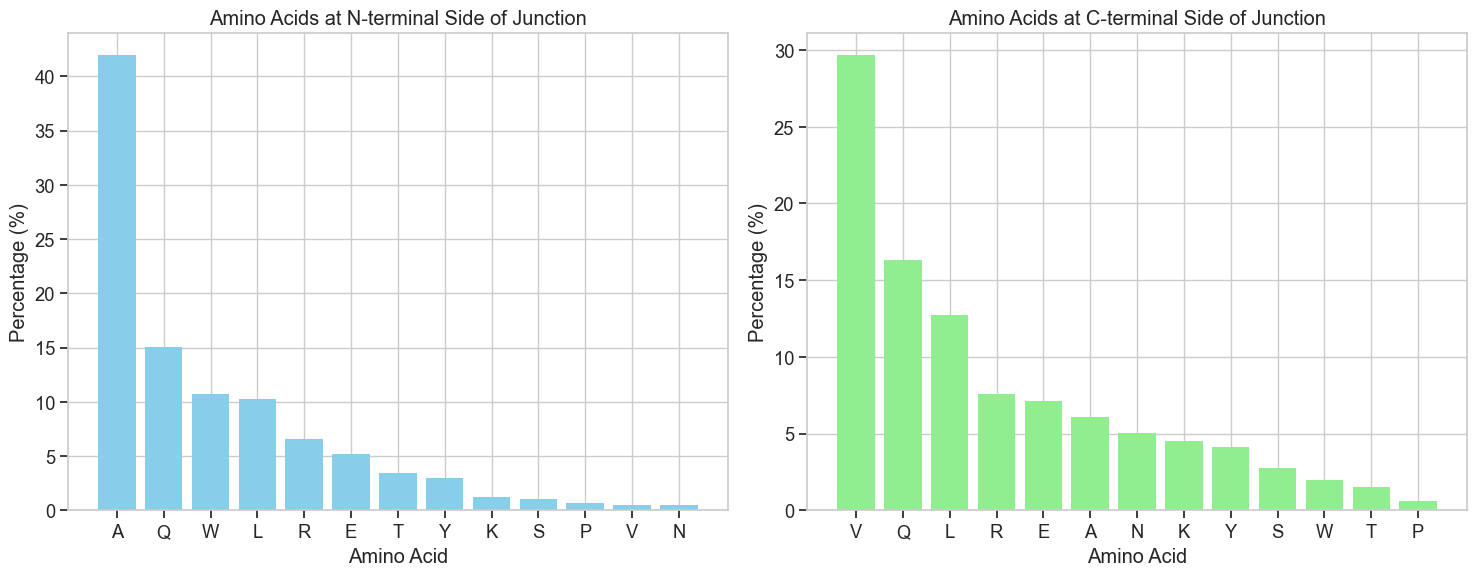


Amino Acid Enrichment/Depletion at Junctions:
N-terminal side:
A: 4.86x enriched
E: 0.60x depleted
K: 0.28x depleted
L: 1.18x enriched
N: 0.10x depleted
P: 0.15x depleted
Q: 1.18x enriched
R: 0.38x depleted
S: 0.25x depleted
T: 0.40x depleted
V: 0.11x depleted
W: 1.17x enriched
Y: 0.66x depleted

C-terminal side:
A: 0.71x depleted
E: 0.83x depleted
K: 0.99x depleted
L: 1.48x enriched
N: 1.11x enriched
P: 0.13x depleted
Q: 1.28x enriched
R: 0.44x depleted
S: 0.68x depleted
T: 0.17x depleted
V: 7.26x enriched
W: 0.21x depleted
Y: 0.91x depleted


In [65]:
# Analyze amino acid preferences at splicing junctions
def analyze_splicing_junctions(df):
    """Analyze the amino acids at splicing junction sites"""
    junction_aa_n_term = []  # N-terminal side of junction
    junction_aa_c_term = []  # C-terminal side of junction
    
    for _, row in df.iterrows():
        if pd.isna(row['positions']) or pd.isna(row['substrateSeq']):
            continue
            
        try:
            # Parse positions (format: "start1_end1_start2_end2")
            positions = row['positions'].split(';')[0]  # Take first position if multiple
            pos_parts = positions.split('_')
            
            if len(pos_parts) >= 4:
                end1 = int(pos_parts[1])
                start2 = int(pos_parts[2])
                
                substrate = row['substrateSeq']
                
                # Get amino acids at junction (if within bounds)
                if 0 < end1 <= len(substrate):
                    junction_aa_n_term.append(substrate[end1-1])
                
                if 0 < start2 <= len(substrate):
                    junction_aa_c_term.append(substrate[start2-1])
        except:
            continue

    #(The function extracts amino acids at the junction points by:
#Parsing the positions column, which contains splicing coordinates in format "start1_end1_start2_end2"
#Identifying end1 (the last position of first segment) and start2 (first position of second segment)
#Extracting the amino acids at these positions from the substrate sequence
#For multiple splicing events, only the first one is analyzed (line 11)
#Mechanism: The function maintains two separate lists for:
#N-terminal junction amino acids (the last amino acid of first segment)
#C-terminal junction amino acids (the first amino acid of second segment))
    
    # Analyze frequency of amino acids at junctions
    n_term_freq = Counter(junction_aa_n_term)
    c_term_freq = Counter(junction_aa_c_term)
    
    # Calculate total counts
    n_total = sum(n_term_freq.values())
    c_total = sum(c_term_freq.values())
    
    # Convert to percentages
    n_term_pct = {aa: count/n_total*100 for aa, count in n_term_freq.items()}
    c_term_pct = {aa: count/c_total*100 for aa, count in c_term_freq.items()}

    
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Sort amino acids by frequency
    n_term_sorted = dict(sorted(n_term_pct.items(), key=lambda x: x[1], reverse=True))
    c_term_sorted = dict(sorted(c_term_pct.items(), key=lambda x: x[1], reverse=True))
    
    ax1.bar(n_term_sorted.keys(), n_term_sorted.values(), color='skyblue')
    ax1.set_title('Amino Acids at N-terminal Side of Junction')
    ax1.set_xlabel('Amino Acid')
    ax1.set_ylabel('Percentage (%)')
    
    ax2.bar(c_term_sorted.keys(), c_term_sorted.values(), color='lightgreen')
    ax2.set_title('Amino Acids at C-terminal Side of Junction')
    ax2.set_xlabel('Amino Acid')
    ax2.set_ylabel('Percentage (%)')
    
    plt.tight_layout()
    plt.show()
    
    #(The function above calculates the frequency distribution by:Counting occurrences of each amino acid using Counter ,Converting raw counts to percentages for easier interpretation)
    
    # Compare to background amino acid frequencies
    aa_counts, total_length = amino_acid_composition([row['substrateSeq'] for _, row in df.iterrows() if isinstance(row['substrateSeq'], str)])
    background_freq = {aa: count/total_length*100 for aa, count in aa_counts.items()}
    
    # Calculate enrichment/depletion at junctions
    #(Key Logic: The function calculates enrichment/depletion by:
    #Determining the background frequency of each amino acid across all substrate proteins
    #Dividing junction frequency by background frequency to get an enrichment ratio
    #Values > 1 indicate enrichment, < 1 indicate depletion)

    print("\nAmino Acid Enrichment/Depletion at Junctions:")
    print("N-terminal side:")
    for aa in sorted(n_term_pct.keys()):
        if aa in background_freq:
            enrichment = n_term_pct[aa] / background_freq[aa]
            print(f"{aa}: {enrichment:.2f}x {'enriched' if enrichment > 1 else 'depleted'}")
    
    print("\nC-terminal side:")
    for aa in sorted(c_term_pct.keys()):
        if aa in background_freq:
            enrichment = c_term_pct[aa] / background_freq[aa]
            print(f"{aa}: {enrichment:.2f}x {'enriched' if enrichment > 1 else 'depleted'}")
    
    return n_term_pct, c_term_pct

# Run the analysis
junction_n_term, junction_c_term = analyze_splicing_junctions(df)






The data presents a striking pattern of amino acid preferences at peptide splicing junctions, revealing a highly non-random distribution that suggests specific biochemical requirements for splicing events.
N-terminal Side (Last amino acid of first segment)
The N-terminal side of splicing junctions shows a dominant preference for alanine (A), which appears:
At an extremely high frequency (~42% of all junctions)
Is 4.86x enriched compared to its background frequency in the proteome
Other notable N-terminal preferences include:
Glutamine (Q), tryptophan (W), and leucine (L) showing moderate enrichment (1.17-1.18x)
Severe depletion of proline (P, 0.15x), asparagine (N, 0.10x), and valine (V, 0.11x)
C-terminal Side (First amino acid of second segment)
The C-terminal side demonstrates a dramatically different pattern:
Valine (V) dominates, appearing at ~30% frequency and showing 7.26x enrichment
Leucine (L, 1.48x), glutamine (Q, 1.28x), and asparagine (N, 1.11x) also show enrichment
Proline (P) is strongly avoided (0.13x), as is threonine (T, 0.17x)
Biological Interpretation
1. Strong Positional Asymmetry
The data reveals a striking asymmetry between N-terminal and C-terminal junction preferences. This suggests:
Different biochemical constraints for each side of the junction
Likely separate recognition mechanisms for the two junction sides
A directional nature to the splicing reaction
2. Size and Structure Preferences
Small Amino Acids Favored at N-terminus: Alanine (A) has a small, non-bulky side chain and is dramatically favored
Hydrophobic Residues at C-terminus: Valine (V) and leucine (L) are hydrophobic and enriched at the C-terminal junction side
Proline Strongly Disfavored at Both Sides: Proline's rigid structure and inability to form certain hydrogen bonds may interfere with splicing chemistry
3. Charge Distribution Patterns
Charged Residues (E, R, K): Generally depleted at both junction sides
Polar Residues: Different patterns (Q enriched at both sides, N depleted at N-terminal but enriched at C-terminal)
4. Mechanistic Implications
The results strongly suggest a mechanism where:
The splicing machinery specifically recognizes alanine at the N-terminal cleavage site
The machinery has a strong preference for valine to begin the second segment
Proline is actively avoided at junction sites, likely due to its structure-disrupting properties
Practical Applications
These findings have significant implications for:
Predicting Splicing Sites: The strong enrichment patterns could be used to develop algorithms to predict potential splicing junctions in proteins.
Designing Synthetic Peptides: For engineered peptides meant to undergo splicing, incorporating alanine at potential N-terminal junctions and valine at C-terminal junctions would likely enhance splicing efficiency.
Understanding Disease Mechanisms: Mutations that change amino acids at potential junction sites could disrupt normal splicing events, potentially contributing to disease mechanisms.
Drug Development: Peptide-based therapeutics could be designed with knowledge of these junction preferences to enhance stability or control degradation.

Summary
The data reveals a highly specific amino acid preference pattern at peptide splicing junctions. Alanine is strongly favored at the N-terminal side (4.86x enriched), while valine is dramatically preferred at the C-terminal side (7.26x enriched). These non-random distributions suggest that the splicing machinery has evolved to recognize specific amino acid properties at junction points, likely optimizing for efficient and accurate splicing reactions.




# Enhanced Analysis at the junctions


=== AMINO ACID FREQUENCIES AT JUNCTION POSITIONS ===

N-terminal side frequencies:
  A: 42.0% - hydrophobic
  Q: 15.1% - polar
  W: 10.7% - hydrophobic
  L: 10.2% - hydrophobic
  R: 6.6% - basic
  E: 5.2% - acidic
  T: 3.4% - polar
  Y: 3.0% - hydrophobic
  K: 1.3% - basic
  S: 1.0% - polar
  P: 0.7% - hydrophobic
  V: 0.5% - hydrophobic
  N: 0.5% - polar

C-terminal side frequencies:
  V: 29.7% - hydrophobic
  Q: 16.3% - polar
  L: 12.8% - hydrophobic
  R: 7.6% - basic
  E: 7.1% - acidic
  A: 6.1% - hydrophobic
  N: 5.1% - polar
  K: 4.5% - basic
  Y: 4.1% - hydrophobic
  S: 2.8% - polar
  W: 2.0% - hydrophobic
  T: 1.5% - polar
  P: 0.6% - hydrophobic


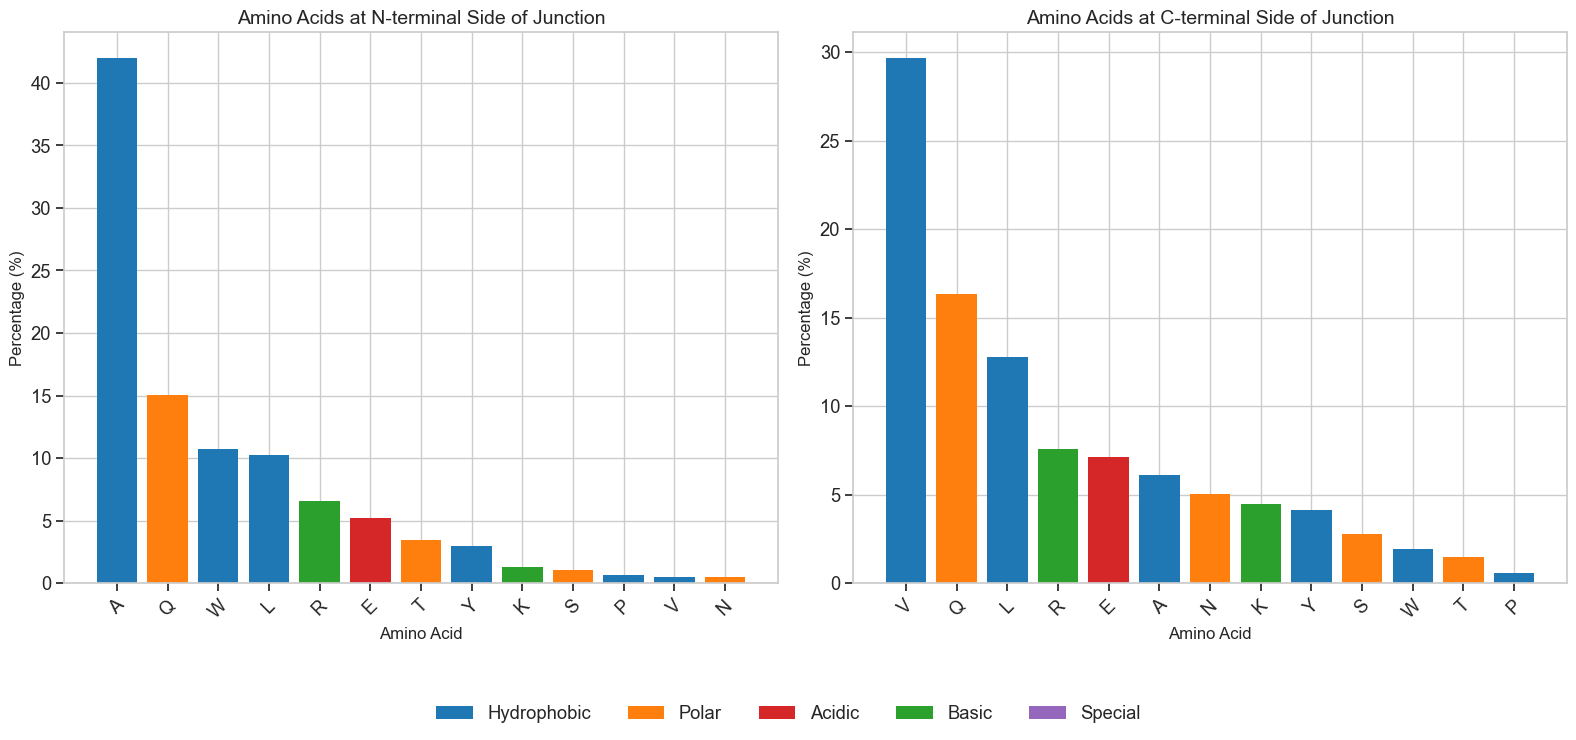


=== PROPERTY DISTRIBUTION AT JUNCTION POSITIONS ===

N-terminal side property distribution:
  hydrophobic: 67.0%
  polar: 20.0%
  basic: 7.8%
  acidic: 5.2%
  special: 0.0%

C-terminal side property distribution:
  hydrophobic: 55.2%
  polar: 25.6%
  basic: 12.1%
  acidic: 7.1%
  special: 0.0%


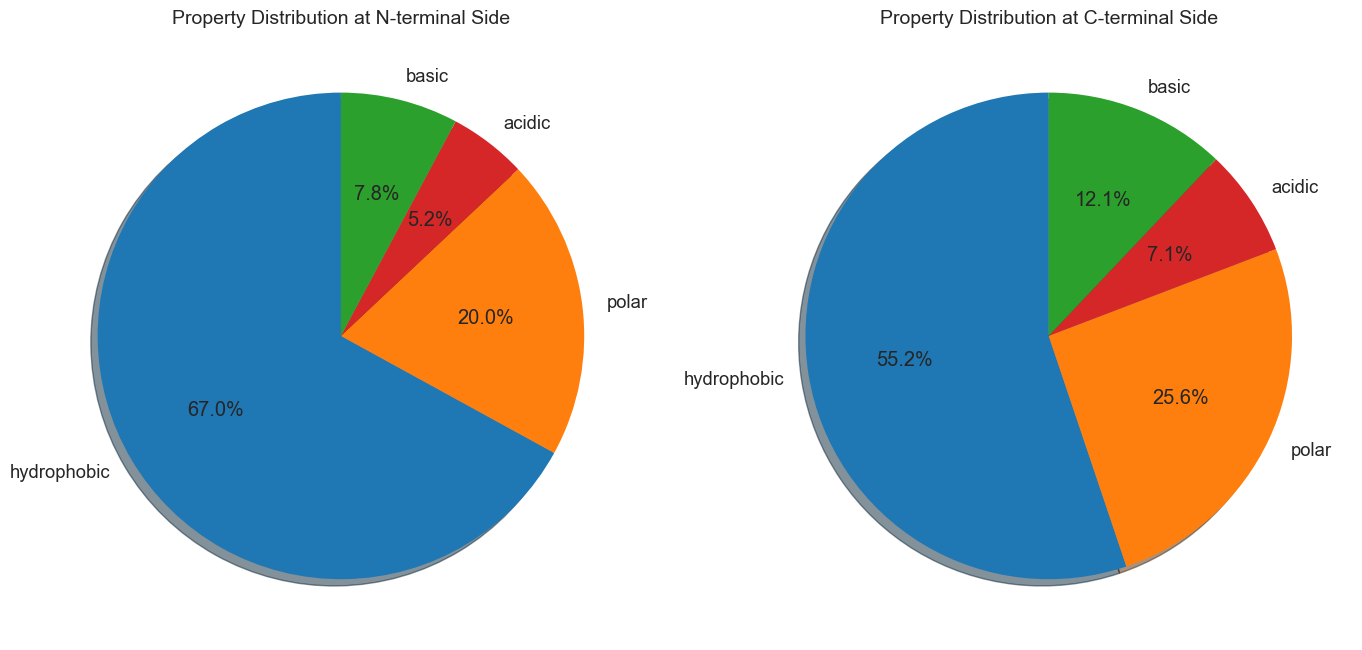


=== DIFFERENTIAL ANALYSIS BETWEEN JUNCTION SIDES ===

Largest differences between N-terminal and C-terminal sides:
  A (hydrophobic): 35.9% more common at N-terminal side
  V (hydrophobic): 29.2% more common at C-terminal side
  W (hydrophobic): 8.7% more common at N-terminal side
  N (polar): 4.6% more common at C-terminal side
  K (basic): 3.2% more common at C-terminal side
  L (hydrophobic): 2.5% more common at C-terminal side
  T (polar): 2.0% more common at N-terminal side
  E (acidic): 2.0% more common at C-terminal side


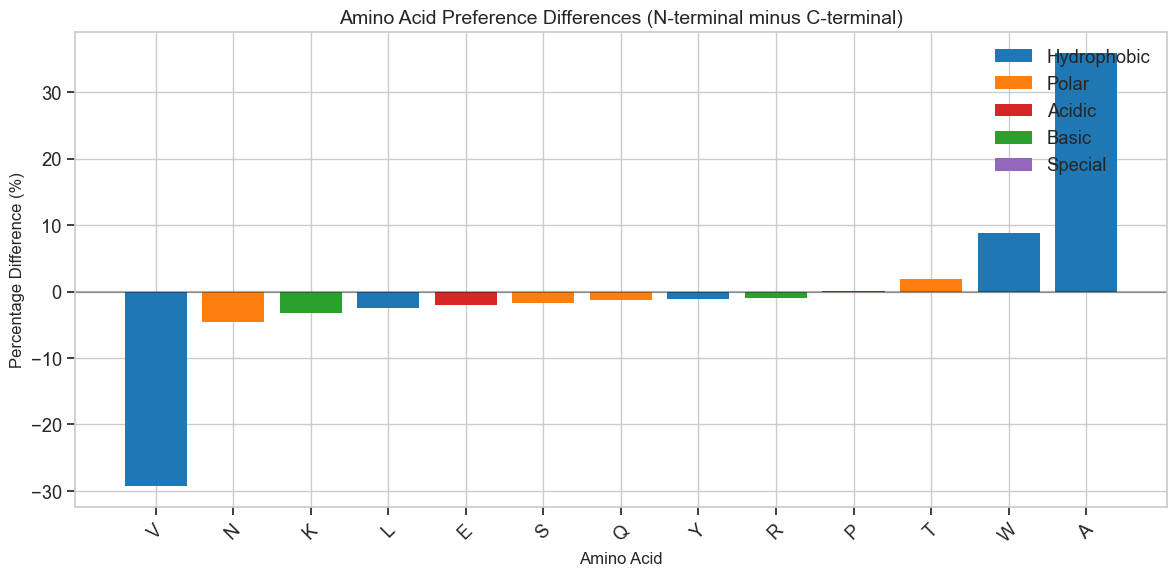


=== SPLICE TYPE SPECIFIC PREFERENCES ===

Top N-terminal amino acids for revCis;trans splice type:
  L: 33.3% - hydrophobic
  A: 27.8% - hydrophobic
  E: 16.7% - acidic
  Y: 11.1% - hydrophobic
  Q: 5.6% - polar

Top N-terminal amino acids for trans;trans splice type:
  Q: 96.2% - polar
  A: 3.8% - hydrophobic

Top N-terminal amino acids for cis splice type:
  W: 27.0% - hydrophobic
  L: 23.0% - hydrophobic
  T: 10.3% - polar
  K: 7.9% - basic
  R: 7.9% - basic

Top N-terminal amino acids for revCis splice type:
  A: 81.4% - hydrophobic
  W: 8.1% - hydrophobic
  E: 6.7% - acidic
  Q: 1.3% - polar
  P: 1.1% - hydrophobic

Top N-terminal amino acids for trans splice type:
  A: 22.7% - hydrophobic
  R: 21.6% - basic
  Q: 11.9% - polar
  Y: 11.3% - hydrophobic
  W: 8.8% - hydrophobic

Top N-terminal amino acids for cis;trans splice type:
  L: 83.3% - hydrophobic
  W: 11.1% - hydrophobic
  T: 5.6% - polar

Top N-terminal amino acids for cis;cis;cis;cis splice type:
  L: 100.0% - hydrophobi

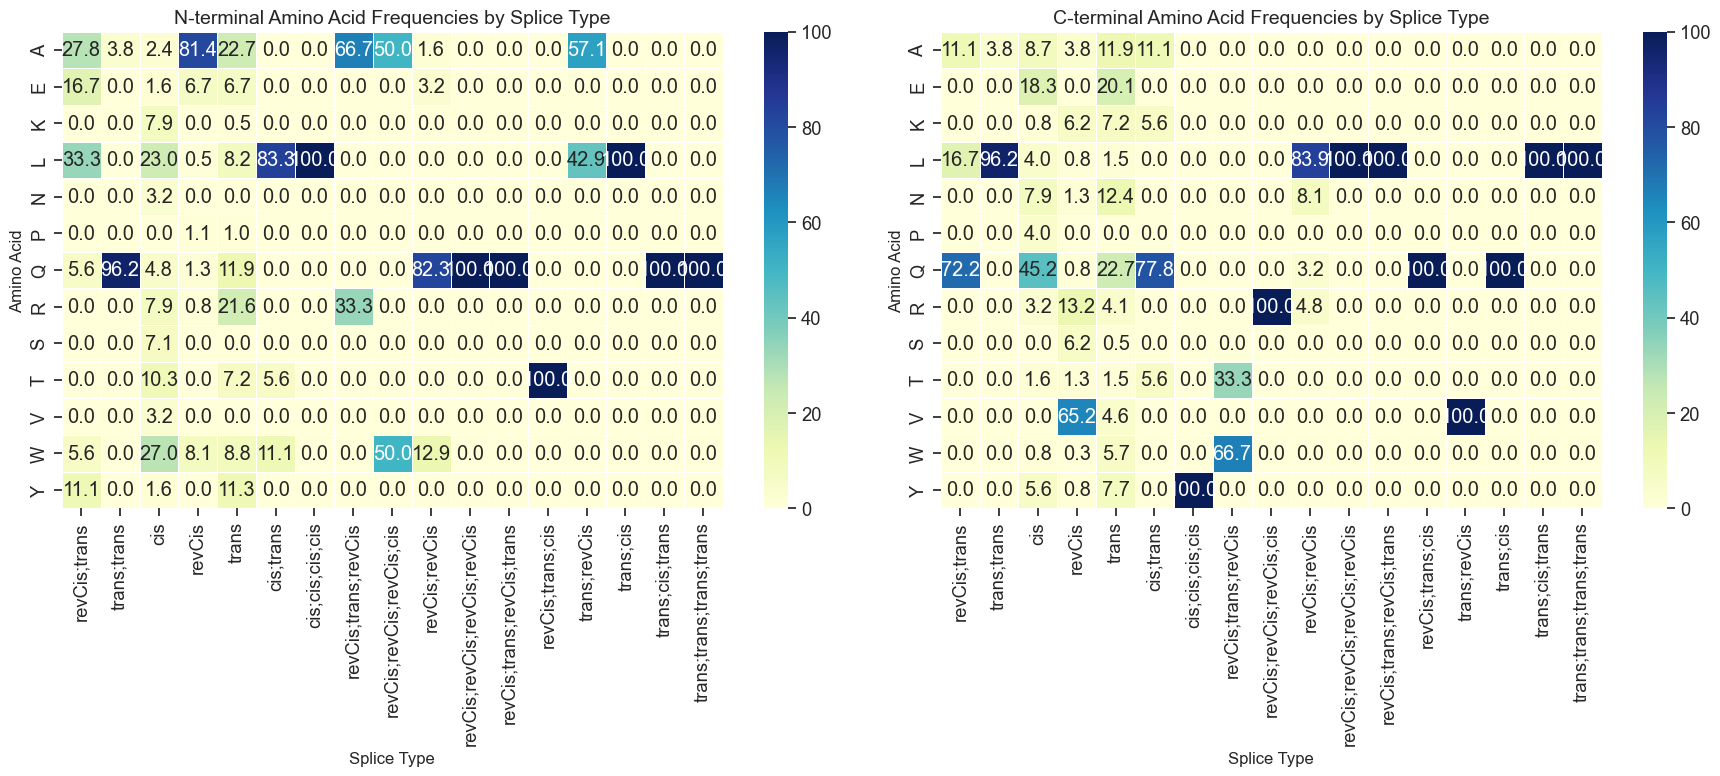


=== FUNCTIONAL GROUP ANALYSIS ===

Functional group distribution at N-terminal side:
  Helix-favoring: 58.6%
  Small: 43.0%
  Hydrophobic: 25.1%
  Polar: 20.0%
  Sheet-favoring: 17.6%
  Charged: 13.0%
  Turn-favoring: 2.2%

Functional group distribution at C-terminal side:
  Hydrophobic: 49.1%
  Sheet-favoring: 37.2%
  Helix-favoring: 30.5%
  Polar: 25.6%
  Charged: 19.2%
  Small: 8.9%
  Turn-favoring: 8.4%


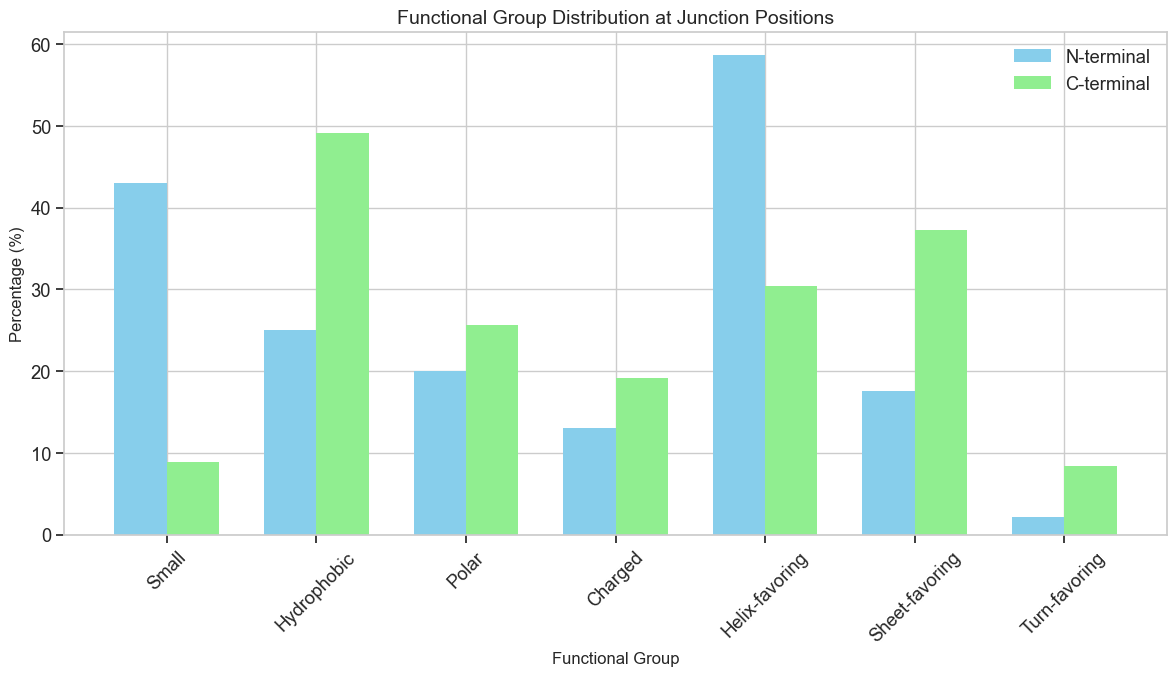


=== ENRICHMENT/DEPLETION RELATIVE TO BACKGROUND ===

N-terminal side enrichment/depletion:
  A: 4.86x enriched (background: 8.6%)
  E: 0.60x depleted (background: 8.6%)
  K: 0.28x depleted (background: 4.5%)
  L: 1.18x enriched (background: 8.6%)
  N: 0.10x depleted (background: 4.5%)
  P: 0.15x depleted (background: 4.5%)
  Q: 1.18x enriched (background: 12.7%)
  R: 0.38x depleted (background: 17.3%)
  S: 0.25x depleted (background: 4.1%)
  T: 0.40x depleted (background: 8.6%)
  V: 0.11x depleted (background: 4.1%)
  W: 1.17x enriched (background: 9.1%)
  Y: 0.66x depleted (background: 4.5%)

C-terminal side enrichment/depletion:
  A: 0.71x depleted (background: 8.6%)
  E: 0.83x depleted (background: 8.6%)
  K: 0.99x depleted (background: 4.5%)
  L: 1.48x enriched (background: 8.6%)
  N: 1.11x enriched (background: 4.5%)
  P: 0.13x depleted (background: 4.5%)
  Q: 1.28x enriched (background: 12.7%)
  R: 0.44x depleted (background: 17.3%)
  S: 0.68x depleted (background: 4.1%)
  T: 0.

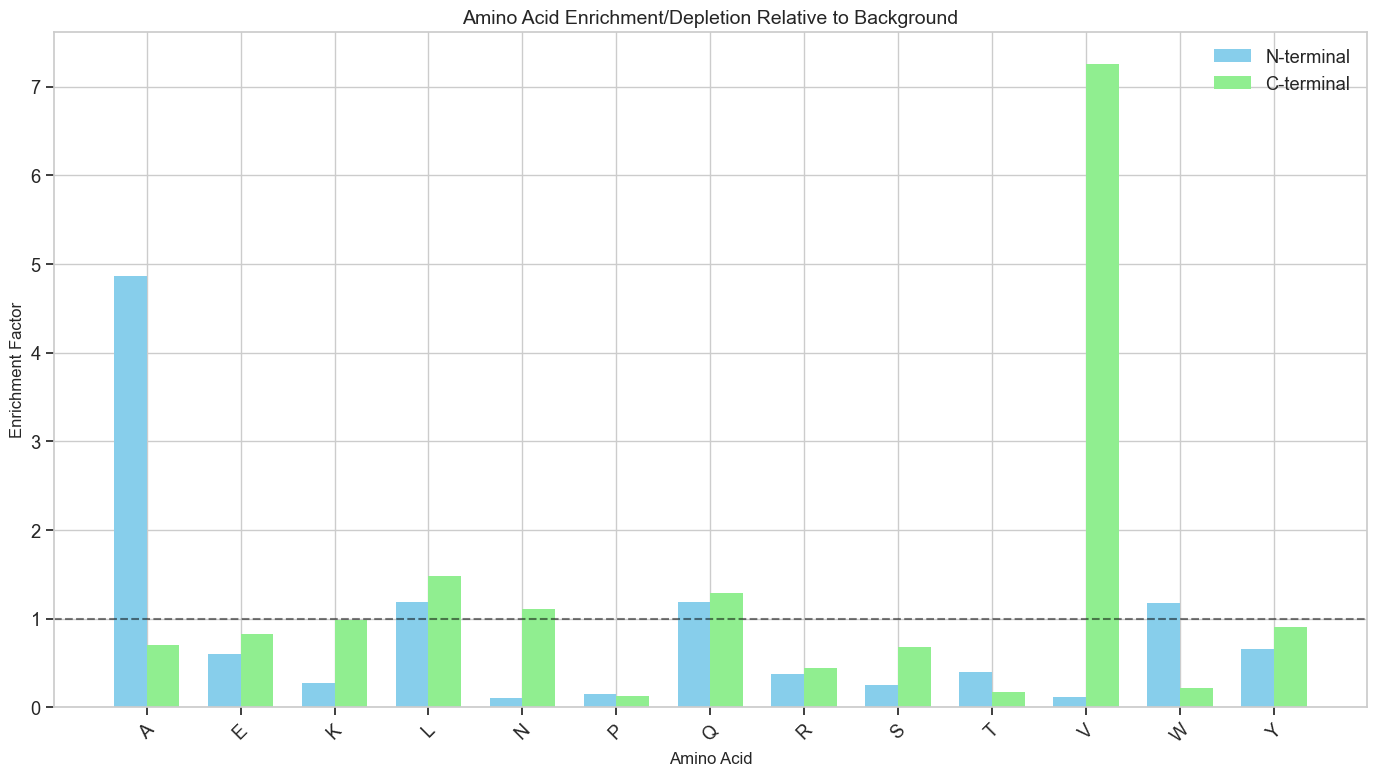


=== STRUCTURAL AND MECHANISTIC INTERPRETATION ===

Structural and mechanistic implications:
  • High presence of small amino acids (43.0% N-term, 8.9% C-term) especially at the N-terminal side suggests flexibility may be important for splicing.
  • Strong hydrophobic presence (25.1% N-term, 49.1% C-term) particularly at the C-terminal side may stabilize the splice junction through hydrophobic interactions.
  • The N-terminal side favors helix-forming amino acids (58.6% vs 17.6%) while the C-terminal side favors sheet-forming amino acids (37.2% vs 30.5%), suggesting a conformational transition at the splice junction.

=== OVERALL INTERPRETATION AND BIOLOGICAL SIGNIFICANCE ===

Key insights from the analysis:
  1. The most common amino acids at the N-terminal side are A (42.0%), Q (15.1%), W (10.7%), while at the C-terminal side they are V (29.7%), Q (16.3%), L (12.8%).
  2. Both junction sides show a preference for hydrophobic amino acids, suggesting this property is important for spli

In [66]:
def enhanced_analyze_splicing_junctions(df):
    """
    Comprehensive analysis of amino acid preferences at splicing junctions including:
    - Frequency analysis
    - Property distribution
    - Splice type effects
    - Enrichment/depletion analysis
    - Structural implications
    - Functional group analysis
    """
    junction_aa_n_term = []  # N-terminal side of junction
    junction_aa_c_term = []  # C-terminal side of junction
    
    # Track splice types for each observation
    splice_types = []
    n_term_by_splice_type = {}
    c_term_by_splice_type = {}
    
    # Define amino acid properties
    aa_properties = {
        'hydrophobic': ['A', 'V', 'L', 'I', 'M', 'F', 'W', 'Y', 'P'],
        'polar': ['S', 'T', 'N', 'Q', 'C'],
        'acidic': ['D', 'E'],
        'basic': ['K', 'R', 'H'],
        'special': ['G']
    }
    
    # Define functional groups
    functional_groups = {
        'Small': ['G', 'A', 'S'],
        'Hydrophobic': ['V', 'L', 'I', 'M', 'F', 'W', 'Y', 'P'],
        'Polar': ['S', 'T', 'N', 'Q', 'C'],
        'Charged': ['D', 'E', 'K', 'R', 'H'],
        'Helix-favoring': ['A', 'L', 'M', 'E', 'K'],
        'Sheet-favoring': ['V', 'I', 'Y', 'F', 'W', 'T'],
        'Turn-favoring': ['G', 'N', 'P', 'S', 'D']
    }
    
    # Create reverse mappings
    aa_to_property = {}
    for prop, aas in aa_properties.items():
        for aa in aas:
            aa_to_property[aa] = prop
            
    aa_to_functional = {}
    for group, aas in functional_groups.items():
        for aa in aas:
            if aa not in aa_to_functional:
                aa_to_functional[aa] = []
            aa_to_functional[aa].append(group)
    
    for _, row in df.iterrows():
        if pd.isna(row['positions']) or pd.isna(row['substrateSeq']):
            continue
            
        try:
            # Parse positions (format: "start1_end1_start2_end2")
            positions = row['positions'].split(';')[0]  # Take first position if multiple
            pos_parts = positions.split('_')
            
            if len(pos_parts) >= 4:
                end1 = int(pos_parts[1])
                start2 = int(pos_parts[2])
                
                substrate = row['substrateSeq']
                
                # Get splice type if available
                splice_type = row.get('spliceType', 'Unknown')
                if splice_type not in n_term_by_splice_type:
                    n_term_by_splice_type[splice_type] = []
                    c_term_by_splice_type[splice_type] = []
                
                # Get amino acids at junction (if within bounds)
                if 0 < end1 <= len(substrate):
                    n_term_aa = substrate[end1-1]
                    junction_aa_n_term.append(n_term_aa)
                    n_term_by_splice_type[splice_type].append(n_term_aa)
                
                if 0 < start2 <= len(substrate):
                    c_term_aa = substrate[start2-1]
                    junction_aa_c_term.append(c_term_aa)
                    c_term_by_splice_type[splice_type].append(c_term_aa)
                    
                # Track splice type for this junction
                splice_types.append(splice_type)
                
        except Exception as e:
            print(f"Error processing row: {e}")
            continue
    
    # Analyze frequency of amino acids at junctions
    n_term_freq = Counter(junction_aa_n_term)
    c_term_freq = Counter(junction_aa_c_term)
    
    # Calculate total counts
    n_total = sum(n_term_freq.values())
    c_total = sum(c_term_freq.values())
    
    # Convert to percentages
    n_term_pct = {aa: count/n_total*100 for aa, count in n_term_freq.items()} if n_total > 0 else {}
    c_term_pct = {aa: count/c_total*100 for aa, count in c_term_freq.items()} if c_total > 0 else {}
    
    # Create data for comprehensive analysis
    all_aa = sorted(set(list(n_term_freq.keys()) + list(c_term_freq.keys())))
    
    # 1. BASIC FREQUENCY ANALYSIS
    print("\n=== AMINO ACID FREQUENCIES AT JUNCTION POSITIONS ===")
    print("\nN-terminal side frequencies:")
    for aa in sorted(n_term_pct.keys(), key=lambda x: n_term_pct[x], reverse=True):
        prop = aa_to_property.get(aa, "unknown")
        print(f"  {aa}: {n_term_pct[aa]:.1f}% - {prop}")
        
    print("\nC-terminal side frequencies:")
    for aa in sorted(c_term_pct.keys(), key=lambda x: c_term_pct[x], reverse=True):
        prop = aa_to_property.get(aa, "unknown")
        print(f"  {aa}: {c_term_pct[aa]:.1f}% - {prop}")
    
    # Plot frequency results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Sort amino acids by frequency
    n_term_sorted = dict(sorted(n_term_pct.items(), key=lambda x: x[1], reverse=True))
    c_term_sorted = dict(sorted(c_term_pct.items(), key=lambda x: x[1], reverse=True))
    
    # Prepare data with property coloring
    n_bars = []
    n_heights = []
    n_colors = []
    for aa, freq in n_term_sorted.items():
        n_bars.append(aa)
        n_heights.append(freq)
        prop = aa_to_property.get(aa, "unknown")
        if prop == 'hydrophobic':
            n_colors.append('#1f77b4')  # blue
        elif prop == 'polar':
            n_colors.append('#ff7f0e')  # orange
        elif prop == 'acidic':
            n_colors.append('#d62728')  # red
        elif prop == 'basic':
            n_colors.append('#2ca02c')  # green
        elif prop == 'special':
            n_colors.append('#9467bd')  # purple
        else:
            n_colors.append('#7f7f7f')  # gray
    
    c_bars = []
    c_heights = []
    c_colors = []
    for aa, freq in c_term_sorted.items():
        c_bars.append(aa)
        c_heights.append(freq)
        prop = aa_to_property.get(aa, "unknown")
        if prop == 'hydrophobic':
            c_colors.append('#1f77b4')  # blue
        elif prop == 'polar':
            c_colors.append('#ff7f0e')  # orange
        elif prop == 'acidic':
            c_colors.append('#d62728')  # red
        elif prop == 'basic':
            c_colors.append('#2ca02c')  # green
        elif prop == 'special':
            c_colors.append('#9467bd')  # purple
        else:
            c_colors.append('#7f7f7f')  # gray
    
    # Create enhanced bar plots
    ax1.bar(n_bars, n_heights, color=n_colors)
    ax1.set_title('Amino Acids at N-terminal Side of Junction', fontsize=14)
    ax1.set_xlabel('Amino Acid', fontsize=12)
    ax1.set_ylabel('Percentage (%)', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    
    ax2.bar(c_bars, c_heights, color=c_colors)
    ax2.set_title('Amino Acids at C-terminal Side of Junction', fontsize=14)
    ax2.set_xlabel('Amino Acid', fontsize=12)
    ax2.set_ylabel('Percentage (%)', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    
    # Add a legend for properties
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#1f77b4', label='Hydrophobic'),
        Patch(facecolor='#ff7f0e', label='Polar'),
        Patch(facecolor='#d62728', label='Acidic'),
        Patch(facecolor='#2ca02c', label='Basic'),
        Patch(facecolor='#9467bd', label='Special')
    ]
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0), 
               ncol=5, frameon=False)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    plt.show()
    
    # 2. PROPERTY DISTRIBUTION ANALYSIS
    print("\n=== PROPERTY DISTRIBUTION AT JUNCTION POSITIONS ===")
    
    # Calculate property frequencies
    n_term_props = {}
    c_term_props = {}
    
    for prop in aa_properties:
        n_term_props[prop] = sum(n_term_pct.get(aa, 0) for aa in aa_properties[prop])
        c_term_props[prop] = sum(c_term_pct.get(aa, 0) for aa in aa_properties[prop])
    
    print("\nN-terminal side property distribution:")
    for prop, pct in sorted(n_term_props.items(), key=lambda x: x[1], reverse=True):
        print(f"  {prop}: {pct:.1f}%")
        
    print("\nC-terminal side property distribution:")
    for prop, pct in sorted(c_term_props.items(), key=lambda x: x[1], reverse=True):
        print(f"  {prop}: {pct:.1f}%")
    
    # Create property distribution pie charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    
    # Color map for properties
    prop_colors = {
        'hydrophobic': '#1f77b4',
        'polar': '#ff7f0e',
        'acidic': '#d62728',
        'basic': '#2ca02c',
        'special': '#9467bd'
    }
    
    # Filter out zero values
    n_term_props_filtered = {k: v for k, v in n_term_props.items() if v > 0}
    c_term_props_filtered = {k: v for k, v in c_term_props.items() if v > 0}
    
    # Prepare colors list matching the filtered properties
    n_colors = [prop_colors[prop] for prop in n_term_props_filtered.keys()]
    c_colors = [prop_colors[prop] for prop in c_term_props_filtered.keys()]
    
    # Create pie charts
    ax1.pie(n_term_props_filtered.values(), labels=n_term_props_filtered.keys(), 
            colors=n_colors, autopct='%1.1f%%', startangle=90, shadow=True)
    ax1.set_title('Property Distribution at N-terminal Side', fontsize=14)
    
    ax2.pie(c_term_props_filtered.values(), labels=c_term_props_filtered.keys(), 
            colors=c_colors, autopct='%1.1f%%', startangle=90, shadow=True)
    ax2.set_title('Property Distribution at C-terminal Side', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    # 3. DIFFERENTIAL ANALYSIS
    print("\n=== DIFFERENTIAL ANALYSIS BETWEEN JUNCTION SIDES ===")
    
    # Compare amino acid frequencies between N and C terminal sides
    diff_analysis = []
    for aa in all_aa:
        n_freq = n_term_pct.get(aa, 0)
        c_freq = c_term_pct.get(aa, 0)
        diff = n_freq - c_freq
        diff_analysis.append({
            'Amino Acid': aa,
            'N-terminal (%)': n_freq,
            'C-terminal (%)': c_freq,
            'Difference (N-C)': diff,
            'Property': aa_to_property.get(aa, 'unknown')
        })
    
    # Sort by absolute difference
    diff_analysis_sorted = sorted(diff_analysis, key=lambda x: abs(x['Difference (N-C)']), reverse=True)
    
    print("\nLargest differences between N-terminal and C-terminal sides:")
    for item in diff_analysis_sorted[:8]:
        aa = item['Amino Acid']
        diff = item['Difference (N-C)']
        preferred = "N-terminal" if diff > 0 else "C-terminal"
        prop = item['Property']
        print(f"  {aa} ({prop}): {abs(diff):.1f}% more common at {preferred} side")
    
    # Create differential bar chart
    plt.figure(figsize=(12, 6))
    
    # Sort amino acids by difference for the plot
    diff_analysis_plot = sorted(diff_analysis, key=lambda x: x['Difference (N-C)'])
    
    # Prepare data for plotting
    aa_list = [item['Amino Acid'] for item in diff_analysis_plot]
    diff_list = [item['Difference (N-C)'] for item in diff_analysis_plot]
    colors = []
    
    for item in diff_analysis_plot:
        prop = item['Property']
        if prop == 'hydrophobic':
            colors.append('#1f77b4')  # blue
        elif prop == 'polar':
            colors.append('#ff7f0e')  # orange
        elif prop == 'acidic':
            colors.append('#d62728')  # red
        elif prop == 'basic':
            colors.append('#2ca02c')  # green
        elif prop == 'special':
            colors.append('#9467bd')  # purple
        else:
            colors.append('#7f7f7f')  # gray
    
    # Create the bar plot
    plt.bar(aa_list, diff_list, color=colors)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.title('Amino Acid Preference Differences (N-terminal minus C-terminal)', fontsize=14)
    plt.xlabel('Amino Acid', fontsize=12)
    plt.ylabel('Percentage Difference (%)', fontsize=12)
    plt.xticks(rotation=45)
    
    # Add a legend for properties
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # 4. SPLICE TYPE ANALYSIS
    print("\n=== SPLICE TYPE SPECIFIC PREFERENCES ===")
    
    # Calculate frequencies by splice type
    n_term_by_type_freq = {}
    c_term_by_type_freq = {}
    
    for splice_type, aas in n_term_by_splice_type.items():
        if len(aas) > 0:
            counter = Counter(aas)
            total = sum(counter.values())
            n_term_by_type_freq[splice_type] = {aa: count/total*100 for aa, count in counter.items()}
            
            print(f"\nTop N-terminal amino acids for {splice_type} splice type:")
            for aa, pct in sorted(n_term_by_type_freq[splice_type].items(), key=lambda x: x[1], reverse=True)[:5]:
                prop = aa_to_property.get(aa, "unknown")
                print(f"  {aa}: {pct:.1f}% - {prop}")
    
    for splice_type, aas in c_term_by_splice_type.items():
        if len(aas) > 0:
            counter = Counter(aas)
            total = sum(counter.values())
            c_term_by_type_freq[splice_type] = {aa: count/total*100 for aa, count in counter.items()}
            
            print(f"\nTop C-terminal amino acids for {splice_type} splice type:")
            for aa, pct in sorted(c_term_by_type_freq[splice_type].items(), key=lambda x: x[1], reverse=True)[:5]:
                prop = aa_to_property.get(aa, "unknown")
                print(f"  {aa}: {pct:.1f}% - {prop}")
    
    # Create heatmaps for splice type preferences if there are multiple splice types
    if len(n_term_by_type_freq) > 1:
        # Prepare data for heatmaps
        n_heatmap_data = {}
        c_heatmap_data = {}
        
        for splice_type in n_term_by_type_freq:
            for aa in all_aa:
                if aa not in n_heatmap_data:
                    n_heatmap_data[aa] = {}
                n_heatmap_data[aa][splice_type] = n_term_by_type_freq[splice_type].get(aa, 0)
        
        for splice_type in c_term_by_type_freq:
            for aa in all_aa:
                if aa not in c_heatmap_data:
                    c_heatmap_data[aa] = {}
                c_heatmap_data[aa][splice_type] = c_term_by_type_freq[splice_type].get(aa, 0)
        
        # Convert to DataFrames
        n_heatmap_df = pd.DataFrame(n_heatmap_data).T
        c_heatmap_df = pd.DataFrame(c_heatmap_data).T
        
        # Create the heatmaps
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
        
        sns.heatmap(n_heatmap_df, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5, ax=ax1)
        ax1.set_title('N-terminal Amino Acid Frequencies by Splice Type', fontsize=14)
        ax1.set_xlabel('Splice Type', fontsize=12)
        ax1.set_ylabel('Amino Acid', fontsize=12)
        
        sns.heatmap(c_heatmap_df, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5, ax=ax2)
        ax2.set_title('C-terminal Amino Acid Frequencies by Splice Type', fontsize=14)
        ax2.set_xlabel('Splice Type', fontsize=12)
        ax2.set_ylabel('Amino Acid', fontsize=12)
        
        plt.tight_layout()
        plt.show()
    
    # 5. FUNCTIONAL GROUP ANALYSIS
    print("\n=== FUNCTIONAL GROUP ANALYSIS ===")
    
    # Calculate functional group frequencies
    n_functional_freq = {group: 0 for group in functional_groups}
    c_functional_freq = {group: 0 for group in functional_groups}
    
    for aa, freq in n_term_pct.items():
        for group in aa_to_functional.get(aa, []):
            n_functional_freq[group] += freq
    
    for aa, freq in c_term_pct.items():
        for group in aa_to_functional.get(aa, []):
            c_functional_freq[group] += freq
    
    print("\nFunctional group distribution at N-terminal side:")
    for group, freq in sorted(n_functional_freq.items(), key=lambda x: x[1], reverse=True):
        print(f"  {group}: {freq:.1f}%")
        
    print("\nFunctional group distribution at C-terminal side:")
    for group, freq in sorted(c_functional_freq.items(), key=lambda x: x[1], reverse=True):
        print(f"  {group}: {freq:.1f}%")
    
    # Create functional group comparison
    functional_comparison = []
    for group in functional_groups:
        n_freq = n_functional_freq.get(group, 0)
        c_freq = c_functional_freq.get(group, 0)
        functional_comparison.append({
            'Functional Group': group,
            'N-terminal (%)': n_freq,
            'C-terminal (%)': c_freq,
            'Difference (N-C)': n_freq - c_freq
        })
    
    # Create grouped bar chart for functional groups
    plt.figure(figsize=(12, 7))
    
    # Prepare data for grouped bars
    groups = [item['Functional Group'] for item in functional_comparison]
    n_vals = [item['N-terminal (%)'] for item in functional_comparison]
    c_vals = [item['C-terminal (%)'] for item in functional_comparison]
    
    x = np.arange(len(groups))
    width = 0.35
    
    plt.bar(x - width/2, n_vals, width, label='N-terminal', color='skyblue')
    plt.bar(x + width/2, c_vals, width, label='C-terminal', color='lightgreen')
    
    plt.title('Functional Group Distribution at Junction Positions', fontsize=14)
    plt.xlabel('Functional Group', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(x, groups, rotation=45)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 6. ENRICHMENT/DEPLETION ANALYSIS WITH BACKGROUND
    try:
        # Compare to background amino acid frequencies
        aa_counts, total_length = amino_acid_composition([row['substrateSeq'] for _, row in df.iterrows() if isinstance(row['substrateSeq'], str)])
        background_freq = {aa: count/total_length*100 for aa, count in aa_counts.items()}
        
        print("\n=== ENRICHMENT/DEPLETION RELATIVE TO BACKGROUND ===")
        
        print("\nN-terminal side enrichment/depletion:")
        n_enrichment = {}
        for aa in sorted(n_term_pct.keys()):
            if aa in background_freq and background_freq[aa] > 0:
                enrichment = n_term_pct[aa] / background_freq[aa]
                n_enrichment[aa] = enrichment
                status = 'enriched' if enrichment > 1 else 'depleted'
                print(f"  {aa}: {enrichment:.2f}x {status} (background: {background_freq[aa]:.1f}%)")
        
        print("\nC-terminal side enrichment/depletion:")
        c_enrichment = {}
        for aa in sorted(c_term_pct.keys()):
            if aa in background_freq and background_freq[aa] > 0:
                enrichment = c_term_pct[aa] / background_freq[aa]
                c_enrichment[aa] = enrichment
                status = 'enriched' if enrichment > 1 else 'depleted'
                print(f"  {aa}: {enrichment:.2f}x {status} (background: {background_freq[aa]:.1f}%)")
        
        # Create enrichment visualization
        plt.figure(figsize=(14, 8))
        
        # Prepare data
        all_enrichment_aa = sorted(set(n_enrichment.keys()) | set(c_enrichment.keys()))
        n_enrichment_vals = [n_enrichment.get(aa, 1) for aa in all_enrichment_aa]
        c_enrichment_vals = [c_enrichment.get(aa, 1) for aa in all_enrichment_aa]
        
        x = np.arange(len(all_enrichment_aa))
        width = 0.35
        
        plt.bar(x - width/2, n_enrichment_vals, width, label='N-terminal', color='skyblue')
        plt.bar(x + width/2, c_enrichment_vals, width, label='C-terminal', color='lightgreen')
        
        plt.axhline(y=1, color='black', linestyle='--', alpha=0.5)
        plt.title('Amino Acid Enrichment/Depletion Relative to Background', fontsize=14)
        plt.xlabel('Amino Acid', fontsize=12)
        plt.ylabel('Enrichment Factor', fontsize=12)
        plt.xticks(x, all_enrichment_aa, rotation=45)
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
    except NameError:
        print("\nCannot perform enrichment analysis: 'amino_acid_composition' function not available.")
    
    # 7. STRUCTURAL AND MECHANISTIC INTERPRETATION
    print("\n=== STRUCTURAL AND MECHANISTIC INTERPRETATION ===")
    
    # Analyze structural tendencies
    structural_implications = []
    
    # Check for small amino acid enrichment at junctions
    small_aa_n = sum(n_term_pct.get(aa, 0) for aa in functional_groups['Small'])
    small_aa_c = sum(c_term_pct.get(aa, 0) for aa in functional_groups['Small'])
    
    if small_aa_n > 25 or small_aa_c > 25:
        side = "N-terminal" if small_aa_n > small_aa_c else "C-terminal"
        structural_implications.append(
            f"High presence of small amino acids ({small_aa_n:.1f}% N-term, {small_aa_c:.1f}% C-term) "
            f"especially at the {side} side suggests flexibility may be important for splicing."
        )
    
    # Check for hydrophobic clustering
    hydrophobic_n = sum(n_term_pct.get(aa, 0) for aa in functional_groups['Hydrophobic'])
    hydrophobic_c = sum(c_term_pct.get(aa, 0) for aa in functional_groups['Hydrophobic'])
    
    if hydrophobic_n > 40 or hydrophobic_c > 40:
        side = "N-terminal" if hydrophobic_n > hydrophobic_c else "C-terminal"
        structural_implications.append(
            f"Strong hydrophobic presence ({hydrophobic_n:.1f}% N-term, {hydrophobic_c:.1f}% C-term) "
            f"particularly at the {side} side may stabilize the splice junction through hydrophobic interactions."
        )
    
    # Check for charge distribution
    charged_n = sum(n_term_pct.get(aa, 0) for aa in functional_groups['Charged'])
    charged_c = sum(c_term_pct.get(aa, 0) for aa in functional_groups['Charged'])
    
    if charged_n > 20 or charged_c > 20:
        side = "N-terminal" if charged_n > charged_c else "C-terminal"
        structural_implications.append(
            f"Significant presence of charged amino acids ({charged_n:.1f}% N-term, {charged_c:.1f}% C-term) "
            f"especially at the {side} side suggests electrostatic interactions may be important for splicing mechanisms."
        )
    
    # Check for secondary structure propensities
    helix_n = sum(n_term_pct.get(aa, 0) for aa in functional_groups['Helix-favoring'])
    helix_c = sum(c_term_pct.get(aa, 0) for aa in functional_groups['Helix-favoring'])
    sheet_n = sum(n_term_pct.get(aa, 0) for aa in functional_groups['Sheet-favoring'])
    sheet_c = sum(c_term_pct.get(aa, 0) for aa in functional_groups['Sheet-favoring'])
    
    if helix_n > sheet_n and helix_c > sheet_c:
        structural_implications.append(
            f"Both junction sides show preference for helix-favoring amino acids "
            f"(N: {helix_n:.1f}% vs {sheet_n:.1f}%, C: {helix_c:.1f}% vs {sheet_c:.1f}%), "
            f"suggesting helical conformations may be favored around splice junctions."
        )
    elif sheet_n > helix_n and sheet_c > helix_c:
        structural_implications.append(
            f"Both junction sides show preference for sheet-favoring amino acids "
            f"(N: {sheet_n:.1f}% vs {helix_n:.1f}%, C: {sheet_c:.1f}% vs {helix_c:.1f}%), "
            f"suggesting extended conformations may be favored around splice junctions."
        )
    elif helix_n > sheet_n and sheet_c > helix_c:
        structural_implications.append(
            f"The N-terminal side favors helix-forming amino acids ({helix_n:.1f}% vs {sheet_n:.1f}%) "
            f"while the C-terminal side favors sheet-forming amino acids ({sheet_c:.1f}% vs {helix_c:.1f}%), "
            f"suggesting a conformational transition at the splice junction."
        )
    
    # Print structural implications
    print("\nStructural and mechanistic implications:")
    for implication in structural_implications:
        print(f"  • {implication}")
    
    if not structural_implications:
        print("  • No strong structural patterns detected. The splice junctions appear to have diverse amino acid compositions.")
    
        # 8. FINAL INTERPRETATION AND SUMMARY
    print("\n=== OVERALL INTERPRETATION AND BIOLOGICAL SIGNIFICANCE ===")
    
    # Find top amino acids at each position
    top_n_aa = sorted(n_term_pct.items(), key=lambda x: x[1], reverse=True)[:3] if n_term_pct else []
    top_c_aa = sorted(c_term_pct.items(), key=lambda x: x[1], reverse=True)[:3] if c_term_pct else []
    
    # Generate summary insights
    insights = []
    
    # Summarize amino acid preferences
    if top_n_aa and top_c_aa:
        n_pref = ", ".join([f"{aa} ({pct:.1f}%)" for aa, pct in top_n_aa])
        c_pref = ", ".join([f"{aa} ({pct:.1f}%)" for aa, pct in top_c_aa])
        insights.append(f"The most common amino acids at the N-terminal side are {n_pref}, " 
                       f"while at the C-terminal side they are {c_pref}.")
    
    # Compare dominant properties
    if n_term_props and c_term_props:
        top_n_prop = max(n_term_props.items(), key=lambda x: x[1]) if n_term_props else None
        top_c_prop = max(c_term_props.items(), key=lambda x: x[1]) if c_term_props else None
        
        if top_n_prop and top_c_prop:
            if top_n_prop[0] == top_c_prop[0]:
                insights.append(f"Both junction sides show a preference for {top_n_prop[0]} amino acids, "
                              f"suggesting this property is important for splice junction formation or stability.")
            else:
                insights.append(f"The N-terminal side favors {top_n_prop[0]} amino acids ({top_n_prop[1]:.1f}%), "
                              f"while the C-terminal side favors {top_c_prop[0]} amino acids ({top_c_prop[1]:.1f}%), "
                              f"indicating distinct roles for each junction side.")
    
    # Summarize functional group insights
    for group in ['Small', 'Hydrophobic', 'Charged']:
        n_val = n_functional_freq.get(group, 0)
        c_val = c_functional_freq.get(group, 0)
        diff = abs(n_val - c_val)
        
        if diff > 10:  # Significant difference
            higher_side = "N-terminal" if n_val > c_val else "C-terminal"
            if group == 'Small':
                insights.append(f"{group} amino acids are significantly more common at the {higher_side} side "
                              f"({max(n_val, c_val):.1f}% vs {min(n_val, c_val):.1f}%), "
                              f"suggesting that size constraints may be important at this position.")
            elif group == 'Hydrophobic':
                insights.append(f"{group} amino acids are significantly more common at the {higher_side} side "
                              f"({max(n_val, c_val):.1f}% vs {min(n_val, c_val):.1f}%), "
                              f"suggesting that hydrophobic interactions may play a role in stabilizing this side of the junction.")
            elif group == 'Charged':
                insights.append(f"{group} amino acids are significantly more common at the {higher_side} side "
                              f"({max(n_val, c_val):.1f}% vs {min(n_val, c_val):.1f}%), "
                              f"suggesting that electrostatic interactions may be important at this position.")
    
    # Summarize splice type-specific insights
    if len(n_term_by_type_freq) > 1:
        insights.append("Different splice types show distinct amino acid preferences, indicating that splice type-specific mechanisms may be at play.")
    
    # Print insights
    print("\nKey insights from the analysis:")
    for i, insight in enumerate(insights, 1):
        print(f"  {i}. {insight}")
    
    # Generate mechanistic hypotheses
    print("\nMechanistic hypotheses based on the analysis:")
    
    # Check for patterns that suggest specific mechanisms
    small_aa_importance = small_aa_n > 20 or small_aa_c > 20
    hydrophobic_importance = hydrophobic_n > 35 or hydrophobic_c > 35
    charged_importance = charged_n > 15 or charged_c > 15
    
    if small_aa_importance:
        print(f"  • The high frequency of small amino acids suggests that flexibility or reduced steric hindrance "
              f"may be important for the splicing mechanism.")
    
    if hydrophobic_importance:
        print(f"  • The prevalence of hydrophobic amino acids suggests that hydrophobic interactions "
              f"may play a role in stabilizing the splice junction.")
    
    if charged_importance:
        print(f"  • The presence of charged amino acids suggests that electrostatic interactions "
              f"may be important for the splicing mechanism or enzyme recognition.")
    
    # Check for junction asymmetry
    n_c_diff = []
    for aa in all_aa:
        n_freq = n_term_pct.get(aa, 0)
        c_freq = c_term_pct.get(aa, 0)
        if abs(n_freq - c_freq) > 5:  # Significant difference
            n_c_diff.append((aa, n_freq - c_freq))
    
    if n_c_diff:
        print(f"  • The asymmetry in amino acid preferences between the N-terminal and C-terminal sides "
              f"suggests distinct structural or functional roles for each side of the junction.")
    
    # 9. EVOLUTIONARY AND SUBSTRATE RECOGNITION IMPLICATIONS
    print("\n=== EVOLUTIONARY AND SUBSTRATE RECOGNITION IMPLICATIONS ===")
    
    # Check for strong preferences that might indicate evolutionary selection
    strong_preferences = [aa for aa in all_aa if n_term_pct.get(aa, 0) > 15 or c_term_pct.get(aa, 0) > 15]
    
    if strong_preferences:
        print(f"Strong preferences for specific amino acids ({', '.join(strong_preferences)}) "
              f"suggest evolutionary selection for optimal splicing efficiency.")
    
    # Check for complementary patterns
    complementary_pairs = []
    for aa1 in all_aa:
        for aa2 in all_aa:
            n_freq1 = n_term_pct.get(aa1, 0)
            c_freq2 = c_term_pct.get(aa2, 0)
            
            # If both are high frequency at complementary positions
            if n_freq1 > 10 and c_freq2 > 10:
                # Check if their properties might be complementary
                prop1 = aa_to_property.get(aa1, "unknown")
                prop2 = aa_to_property.get(aa2, "unknown")
                
                if ((prop1 == 'acidic' and prop2 == 'basic') or 
                    (prop1 == 'basic' and prop2 == 'acidic') or
                    (prop1 == 'hydrophobic' and prop2 == 'hydrophobic')):
                    complementary_pairs.append((aa1, aa2, prop1, prop2))
    
    if complementary_pairs:
        print("\nPotential complementary amino acid pairs at junction sides:")
        for aa1, aa2, prop1, prop2 in complementary_pairs:
            print(f"  • {aa1} ({prop1}) at N-terminal with {aa2} ({prop2}) at C-terminal")
            print(f"    This could indicate specific recognition patterns or stabilizing interactions.")
    
    # Substrate recognition implications
    print("\nSubstrate recognition implications:")
    
    if strong_preferences or complementary_pairs:
        print("  • The specific amino acid preferences observed may reflect recognition requirements for splicing enzymes.")
        print("  • These patterns could serve as molecular 'signatures' that guide the splicing machinery.")
    else:
        print("  • The diverse amino acid composition suggests that substrate recognition may rely on broader sequence contexts")
        print("    or structural features rather than specific amino acids at the junction positions.")
    
    # 10. SUGGESTIONS FOR FURTHER ANALYSIS
    print("\n=== SUGGESTIONS FOR FURTHER ANALYSIS ===")
    
    print("Based on these findings, consider the following additional analyses:")
    print("  1. Sequence context analysis: Examine the broader sequence context (±5 positions) around junctions")
    print("  2. Conservation analysis: Look at evolutionary conservation of junction amino acids across species")
    print("  3. Structural modeling: Predict how junction properties affect 3D structure of the spliced proteins")
    print("  4. Comparative analysis: Compare these findings with known splice site preferences in different systems")
    print("  5. Validation experiments: Test the importance of identified amino acids through mutagenesis")
    
    # Create a dictionary to return all results
    results = {
        'n_term_frequencies': n_term_pct,
        'c_term_frequencies': c_term_pct,
        'n_term_by_splice_type': n_term_by_type_freq,
        'c_term_by_splice_type': c_term_by_type_freq,
        'property_distribution_n': n_term_props,
        'property_distribution_c': c_term_props,
        'functional_group_n': n_functional_freq,
        'functional_group_c': c_functional_freq,
        'differential_analysis': diff_analysis,
        'structural_implications': structural_implications,
        'key_insights': insights
    }
    
    return results

# Example usage
if 'df' in globals():
    try:
        results = enhanced_analyze_splicing_junctions(df)
        print("\nAnalysis complete. Results are available in the returned dictionary.")
    except Exception as e:
        print(f"Error running enhanced analysis: {e}")
else:
    print("Please load your data into a DataFrame named 'df' before running this function.")

# Hydrophobicity and Charge Analysis Around Junctions

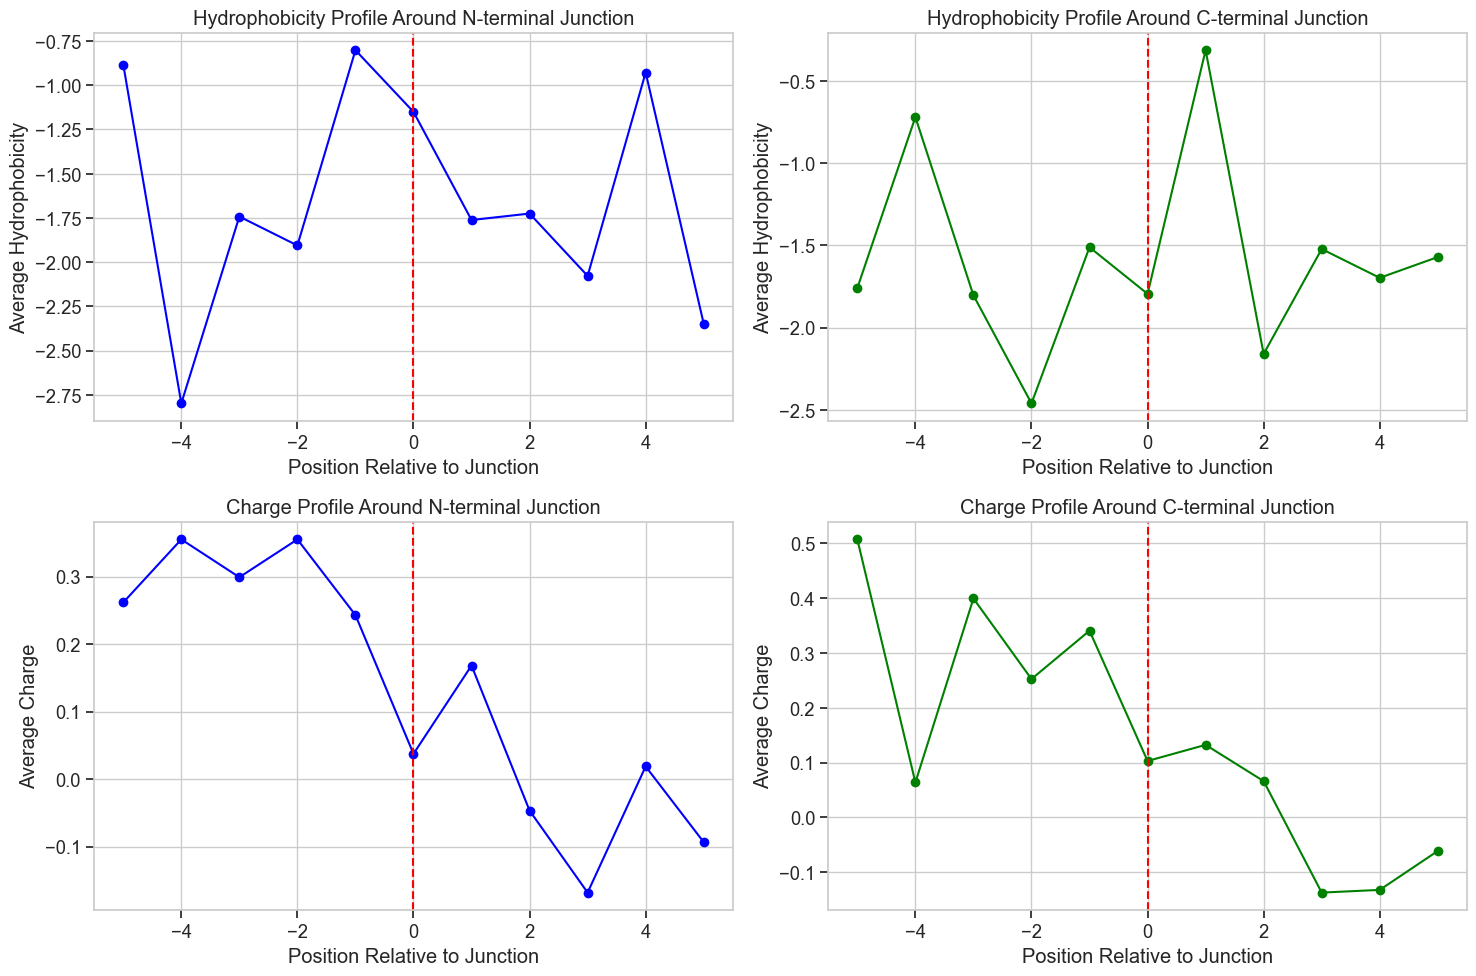

In [67]:
# Analyze hydrophobicity and charge profiles around splicing junctions
def analyze_physicochemical_properties_at_junctions(df, window_size=5):
    """Analyze hydrophobicity and charge around splicing junctions"""
    # Amino acid property scales
    hydrophobicity = {
        'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5, 'Q': -3.5, 'E': -3.5,
        'G': -0.4, 'H': -3.2, 'I': 4.5, 'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8,
        'P': -1.6, 'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
    }
    
    charge = {
        'A': 0, 'R': 1, 'N': 0, 'D': -1, 'C': 0, 'Q': 0, 'E': -1,
        'G': 0, 'H': 0.5, 'I': 0, 'L': 0, 'K': 1, 'M': 0, 'F': 0,
        'P': 0, 'S': 0, 'T': 0, 'W': 0, 'Y': 0, 'V': 0
    }
    
    # Initialize arrays to store property profiles
    hydro_profile_n = np.zeros(2*window_size+1)
    hydro_profile_c = np.zeros(2*window_size+1)
    charge_profile_n = np.zeros(2*window_size+1)
    charge_profile_c = np.zeros(2*window_size+1)
    
    # Counters for valid sequences
    n_count = 0
    c_count = 0
    
    for _, row in df.iterrows():
        if pd.isna(row['positions']) or pd.isna(row['substrateSeq']):
            continue
            
        try:
            # Parse positions
            positions = row['positions'].split(';')[0]
            pos_parts = positions.split('_')
            
            if len(pos_parts) >= 4:
                end1 = int(pos_parts[1])
                start2 = int(pos_parts[2])
                
                substrate = row['substrateSeq']
                
                # Analyze around N-terminal junction
                if window_size < end1 < len(substrate)-window_size:
                    region = substrate[end1-window_size-1:end1+window_size]
                    for i, aa in enumerate(region):
                        if aa in hydrophobicity:
                            hydro_profile_n[i] += hydrophobicity[aa]
                            charge_profile_n[i] += charge[aa]
                    n_count += 1
                
                # Analyze around C-terminal junction
                if window_size < start2 < len(substrate)-window_size:
                    region = substrate[start2-window_size-1:start2+window_size]
                    for i, aa in enumerate(region):
                        if aa in hydrophobicity:
                            hydro_profile_c[i] += hydrophobicity[aa]
                            charge_profile_c[i] += charge[aa]
                    c_count += 1
        except:
            continue
    
    # Normalize by count
    if n_count > 0:
        hydro_profile_n /= n_count
        charge_profile_n /= n_count
    
    if c_count > 0:
        hydro_profile_c /= c_count
        charge_profile_c /= c_count
    
    # Plot profiles
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    x = np.arange(-window_size, window_size+1)
    junction_point = window_size  # Index of the junction
    
    # Hydrophobicity profiles
    ax1.plot(x, hydro_profile_n, 'b-', marker='o')
    ax1.axvline(x=0, color='r', linestyle='--')
    ax1.set_title('Hydrophobicity Profile Around N-terminal Junction')
    ax1.set_xlabel('Position Relative to Junction')
    ax1.set_ylabel('Average Hydrophobicity')
    
    ax2.plot(x, hydro_profile_c, 'g-', marker='o')
    ax2.axvline(x=0, color='r', linestyle='--')
    ax2.set_title('Hydrophobicity Profile Around C-terminal Junction')
    ax2.set_xlabel('Position Relative to Junction')
    ax2.set_ylabel('Average Hydrophobicity')
    
    # Charge profiles
    ax3.plot(x, charge_profile_n, 'b-', marker='o')
    ax3.axvline(x=0, color='r', linestyle='--')
    ax3.set_title('Charge Profile Around N-terminal Junction')
    ax3.set_xlabel('Position Relative to Junction')
    ax3.set_ylabel('Average Charge')
    
    ax4.plot(x, charge_profile_c, 'g-', marker='o')
    ax4.axvline(x=0, color='r', linestyle='--')
    ax4.set_title('Charge Profile Around C-terminal Junction')
    ax4.set_xlabel('Position Relative to Junction')
    ax4.set_ylabel('Average Charge')
    
    plt.tight_layout()
    plt.show()
    
    return (hydro_profile_n, hydro_profile_c, charge_profile_n, charge_profile_c)

# Run the analysis
junction_properties = analyze_physicochemical_properties_at_junctions(df)

# Sequence Motif Analyis  

In [68]:
# Analyze sequence motifs around splicing sites
def analyze_splicing_motifs(df, window_size=3):
    """Analyze sequence motifs around splicing junctions"""
    n_term_motifs = []  # Motifs before the N-terminal junction
    c_term_motifs = []  # Motifs after the C-terminal junction
    
    for _, row in df.iterrows():
        if pd.isna(row['positions']) or pd.isna(row['substrateSeq']):
            continue
            
        try:
            # Parse positions
            positions = row['positions'].split(';')[0]
            pos_parts = positions.split('_')
            
            if len(pos_parts) >= 4:
                end1 = int(pos_parts[1])
                start2 = int(pos_parts[2])
                
                substrate = row['substrateSeq']
                
                # Get motifs around junctions (with bounds checking)
                if end1 > window_size:
                    n_term_motif = substrate[end1-window_size-1:end1]
                    n_term_motifs.append(n_term_motif)
                
                if start2+window_size <= len(substrate):
                    c_term_motif = substrate[start2-1:start2+window_size]
                    c_term_motifs.append(c_term_motif)
        except:
            continue
    
    # Count motif frequencies
    n_term_freq = Counter(n_term_motifs)
    c_term_freq = Counter(c_term_motifs)
    
    # Display top motifs
    print(f"\nTop {window_size}-residue motifs before N-terminal junction:")
    for motif, count in n_term_freq.most_common(10):
        print(f"{motif}: {count} occurrences")
    
    print(f"\nTop {window_size}-residue motifs after C-terminal junction:")
    for motif, count in c_term_freq.most_common(10):
        print(f"{motif}: {count} occurrences")
    
    return n_term_freq, c_term_freq

# Run the analysis
n_term_motifs, c_term_motifs = analyze_splicing_motifs(df, window_size=3)


Top 3-residue motifs before N-terminal junction:
WTEA: 357 occurrences
TEAQ: 111 occurrences
YPEW: 69 occurrences
SRQL: 65 occurrences
EAQR: 45 occurrences
EWTE: 34 occurrences
RQLY: 26 occurrences
TKAW: 24 occurrences
NRQL: 24 occurrences
WNRQ: 19 occurrences

Top 3-residue motifs after C-terminal junction:
VSRQ: 258 occurrences
QLYP: 107 occurrences
RTKA: 60 occurrences
LYPE: 57 occurrences
LRTK: 54 occurrences
AWNR: 52 occurrences
NRQL: 44 occurrences
EWTE: 41 occurrences
KAWN: 39 occurrences
YPEW: 36 occurrences
